# The Movie Dataset Capstone Project
## By: Dave Das

### Project Data
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

### Package & Library Setup 
 
This code imports various packages and libraries used for data analysis and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.formula.api as smf
import scipy
from scipy import stats
from scipy.stats import chi2_contingency

import json
import sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import sklearn.linear_model
from sklearn.linear_model import LinearRegression

import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

import sklearn.svm
from sklearn.svm import SVC

import sklearn.model_selection
from sklearn.model_selection import train_test_split


### Loading the Data, Cleaning & EDA

This code initializes 2 pandas dataframea "df" and "df1" by reading a CSV file named "tmdb_5000_movies.csv" and "tmdb_5000_credits.csv" located in the "data/Project" directory. The data in the CSV files will be loaded into the dataframes for further processing and analysis.

In [2]:
# initialize dataframe
df = pd.read_csv('data/Project/tmdb_5000_movies.csv')


In [3]:
# initialize dataframe
df1 = pd.read_csv('data/Project/tmdb_5000_credits.csv')


The code df.dtypes znd df1.dtypes returns the data types of the columns in the dataframes. This is done to get an understanding of the types of data stored in each column, as this information is important for data cleaning and preprocessing. It also helps in identifying any incorrect data types that need to be corrected.

In [4]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [5]:
df1.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

This code performs the following operations on the "release_date" column of the dataframe "df":

- Converts the values in the "release_date" column from string format to datetime format using the pd.to_datetime() function.
- Finds the earliest and latest records in the "release_date" column using the min() and max() functions, respectively.
- Calculates the range of the "release_date" column by subtracting the earliest record from the latest record.
- Prints the earliest and latest records, as well as the range of the "release_date" column, for reference.

In [6]:
# convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# find earliest and latest record
earliest_record = df['release_date'].min()
latest_record = df['release_date'].max()

# calculate range
range_of_release_dates = latest_record - earliest_record

# print the results
print("Earliest record:", earliest_record)
print("Latest record:", latest_record)
print("Range of release dates:", range_of_release_dates)

Earliest record: 1916-09-04 00:00:00
Latest record: 2017-02-03 00:00:00
Range of release dates: 36677 days 00:00:00


In [7]:
df.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

- *The earliest record is 1916-09-04 00:00:00 and the latest record is 2017-02-03 00:00:00*
- *The release_date is now formatted properly to datetime64[ns]*

In [8]:
# renames a column id as movie_id

df.rename(columns={'id': 'movie_id'}, inplace=True)

This code creates a Plotly bar chart to visualize the number of missing values for each column in a df. The code starts by calculating the sum of missing values for each column and storing the result in a variable "missing_data". The columns in "missing_data" are then renamed to "column_name" and "missing_count". The resulting data is filtered to only include columns that have missing values and sorted by the number of missing values in descending order. Finally, a bar chart is created with "column_name" on the x-axis and "missing_count" on the y-axis. 

In [9]:
zero_data = (df == 0).sum().reset_index()
zero_data.columns = ['column_name', 'zero_count']
zero_data = zero_data[zero_data['zero_count'] > 0]
zero_data = zero_data.sort_values('zero_count', ascending=False)

missing_data = df.isna().sum().reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data[missing_data['missing_count'] > 0]
missing_data = missing_data.sort_values('missing_count', ascending=False)

merged_data = missing_data.merge(zero_data, on='column_name', how='outer')
merged_data = merged_data.fillna(0)

fig = px.bar(merged_data, x='column_name', y=['missing_count', 'zero_count'], barmode='stack', height=400)
fig.update_layout(title_text='Missing and Zero Data')
fig.show()


#### Function Description: count_zeros
This code defines a function called count_zeros that takes a pandas dataframe df as an input. The function then creates an empty dictionary zero_counts and iterates over each column in the dataframe. For each column, it calculates the number of zero values by summing up the number of times the values in the column equal 0, and adds the result as a key-value pair to the zero_counts dictionary, where the key is the name of the column and the value is the count of zero values in the column. Finally, the function returns the zero_counts dictionary.

In [10]:
def count_zeros(df):
    zero_counts = {}
    for col in df.columns:
        count = sum(df[col] == 0)
        if count > 0:
            zero_counts[col] = count
    return zero_counts

In [11]:
zero_counts = count_zeros(df)
print(zero_counts)

{'budget': 1037, 'popularity': 1, 'revenue': 1427, 'runtime': 35, 'vote_average': 63, 'vote_count': 62}


- *The result shows that the columns in df have zeros. 'budget' has 1037 zeros, 'popularity' has 1 zero, 'revenue' has 1427 zeros, 'runtime' has 35 zeros, 'vote_average' has 63 zeros, and 'vote_count' has 62 zeros.*

In [12]:
zero_counts = count_zeros(df1)
print(zero_counts)

{}


- *The result shows that the no columns in df1 have zeros.*

This code is filtering out rows in the dataframe df where the values in the columns "revenue" and "budget" are equal to 0. This is to ensure that the analysis performed does not include any rows with missing or irrelevant data, resulting in a cleaner data set.

In [13]:
df = df[(df["revenue"] != 0) & (df["budget"] != 0)]


In [14]:
zero_counts = count_zeros(df)
print(zero_counts)

{'vote_average': 2, 'vote_count': 2}


- *The result shows that the no vote_average and vote_count have zeros.*

This code is filtering out rows in the dataframe df where the values in the columns "vote_average" are equal to 0.

In [15]:
df = df[(df["vote_average"] != 0)]

In [16]:
zero_counts = count_zeros(df)
print(zero_counts)

{}


- *The result shows that the no more columns in the dataframe df have zeros.*

In [17]:
df1.head(3)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...

#### Function Description: analyze_data
This function provides statistics for each column in a given dataframe. It distinguishes between numeric and non-numeric data types, and calculates various statistics such as the mean, median, minimum, and maximum values for numeric columns. For non-numeric columns, it returns the number of unique values. 

This code contains three functions:

- The analyze_data function takes as input a pandas DataFrame and performs analysis on each column in the DataFrame. The function starts by looping over each column in the DataFrame, and for each column, it retrieves the data type of that column. If the data type is either int or float, the function calls the analyze_numeric_column function, passing the DataFrame and the column name. If the data type is not an int or float, the function calls the analyze_non_numeric_column function.

- The analyze_numeric_column function takes as input a DataFrame and the name of a numeric column and prints some statistical information about the column such as mean, median, minimum, and maximum.

- The analyze_non_numeric_column function takes as input a DataFrame and the name of a non-numeric column and prints the count of unique values in that column.


In [18]:
def analyze_data(data):
    # analyze each column in the data
    for column in data.columns:
        column_type = data[column].dtype
        print(f"Field Name: {column}")
        print(f"Data Type: {column_type}")
        print(f"Unique Values: {data[column].nunique()}")
        print(f"Missing Values: {data[column].isnull().sum()}")
        if column_type in [int, float]:
            analyze_numeric_column(data, column)
        else:
            analyze_non_numeric_column(data, column)

def analyze_numeric_column(data, column):
    print(f"Statistics for numeric column: {column}")
    print(f"Non-Zero Values: {data[column].astype(bool).sum(axis=0)}")
    print(f"Mean: {data[column].mean()}")
    print(f"Median: {data[column].median()}")
    print(f"Min: {data[column].min()}")
    print(f"Max: {data[column].max()}")
    print()

def analyze_non_numeric_column(data, column):
    print(f"Statistics for object column: {column}")
    print(f"Unique values count: {data[column].nunique()}")
    print()


### DATA CHECKPOINT
The code below performs a data checkpoint by overwriting the original data frame df with df_copy. This is done to ensure that any changes made to df in previous sections do not impact the original, clean version of the data stored in df_copy. By overwriting df with df_copy, the code creates a fresh starting point for subsequent data analysis and manipulation.

In [19]:
# Save a copy of df with a different name
df_copy = df.copy()

# Overwrite df with df_copy
# df = df_copy

In [20]:
# analyze df
analyze_data(df)

Field Name: budget
Data Type: int64
Unique Values: 385
Missing Values: 0
Statistics for numeric column: budget
Non-Zero Values: 3227
Mean: 40678773.52835451
Median: 25000000.0
Min: 1
Max: 380000000

Field Name: genres
Data Type: object
Unique Values: 933
Missing Values: 0
Statistics for object column: genres
Unique values count: 933

Field Name: homepage
Data Type: object
Unique Values: 1324
Missing Values: 1882
Statistics for object column: homepage
Unique values count: 1324

Field Name: movie_id
Data Type: int64
Unique Values: 3227
Missing Values: 0
Statistics for numeric column: movie_id
Non-Zero Values: 3227
Mean: 44601.87077781221
Median: 11442.0
Min: 5
Max: 417859

Field Name: keywords
Data Type: object
Unique Values: 3097
Missing Values: 0
Statistics for object column: keywords
Unique values count: 3097

Field Name: original_language
Data Type: object
Unique Values: 27
Missing Values: 0
Statistics for object column: original_language
Unique values count: 27

Field Name: original

In [21]:
# analyze df1
analyze_data(df1)

Field Name: movie_id
Data Type: int64
Unique Values: 4803
Missing Values: 0
Statistics for numeric column: movie_id
Non-Zero Values: 4803
Mean: 57165.484280657925
Median: 14629.0
Min: 5
Max: 459488

Field Name: title
Data Type: object
Unique Values: 4800
Missing Values: 0
Statistics for object column: title
Unique values count: 4800

Field Name: cast
Data Type: object
Unique Values: 4761
Missing Values: 0
Statistics for object column: cast
Unique values count: 4761

Field Name: crew
Data Type: object
Unique Values: 4776
Missing Values: 0
Statistics for object column: crew
Unique values count: 4776



## Inspect the data a little closer

Inspect a sample of columns for a row. The code row = df.iloc[2] is selecting the third row (index 2) of df.

In [22]:
row = df.iloc[2]
print(row['original_title'])

Spectre


In [23]:
row = df.iloc[2]
print(row['release_date'])

2015-10-26 00:00:00


In [24]:
row = df.iloc[2]
print(row['movie_id'])

206647


In [25]:
row = df.iloc[2]
print(row['production_companies'])

[{"name": "Columbia Pictures", "id": 5}, {"name": "Danjaq", "id": 10761}, {"name": "B24", "id": 69434}]


The data is a list of dictionaries, where each dictionary contains two keys: "id" and "name". The "id" key represents a unique identifier for a production company and the "name" key represents the name of the movie genre. The list contains production companies such as, e.g. "Columbia Pictures", "Danjaq", and "B24".

In [26]:
row = df.iloc[2]
print(row['genres'])

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]


The data is a list of dictionaries representing movie genres, where each dictionary contains two keys, "id" and "name", and their respective values. The "id" key represents a unique identifier for a movie genre and the "name" key represents the name of that movie genre. The list contains movie genres, e.g. "Action", "Adventure", and "Crime".

In [27]:
row = df.iloc[2]
print(row['keywords'])

[{"id": 470, "name": "spy"}, {"id": 818, "name": "based on novel"}, {"id": 4289, "name": "secret agent"}, {"id": 9663, "name": "sequel"}, {"id": 14555, "name": "mi6"}, {"id": 156095, "name": "british secret service"}, {"id": 158431, "name": "united kingdom"}]


The data is a list of dictionaries representing movie keywords, where each dictionary contains two keys, "id" and "name", and their respective values. The "id" key represents a unique identifier for a keyword to describe the film and the "name" key represents the name of that keywords. The list contains movie genres, e.g. "mi6", "british secret service", and "united kingdom".

In [28]:
#make a dataframe for the movie_ids
df_ids = df[['movie_id']]

df_ids.head(3)

movie_id
0     19995
1       285
2    206647

In [29]:
#make a dataframe for the movie_ids and original_title
df_ids_titles = df[['movie_id', 'original_title']]
df_ids_titles.head(3)

movie_id                            original_title
0     19995                                    Avatar
1       285  Pirates of the Caribbean: At World's End
2    206647                                   Spectre

In [30]:
df.head(1)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage  movie_id  \
0  http://www.avatarmovie.com/     19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   

                       tagline   title  vote_average  vote_count  
0  Enter the World of Pandora.  Avatar           7.2       11800

## Correlation Matrix
The correlation matrix provides a summary of the relationships between each pair of variables and helps to: 

- Identify multicollinearity: Correlation matrix helps us identify the degree of correlation between variables. If two or more variables have a high degree of correlation, it is known as multicollinearity, and this can have a negative impact on the results of some statistical models.

- Select variables for modeling: The correlation matrix can be used to select variables for modeling by identifying the variables with the strongest correlation to the target variable.

- Identify relationships between variables: The correlation matrix can show if variables have a positive or negative relationship with each other, which can inform further analysis and modeling.

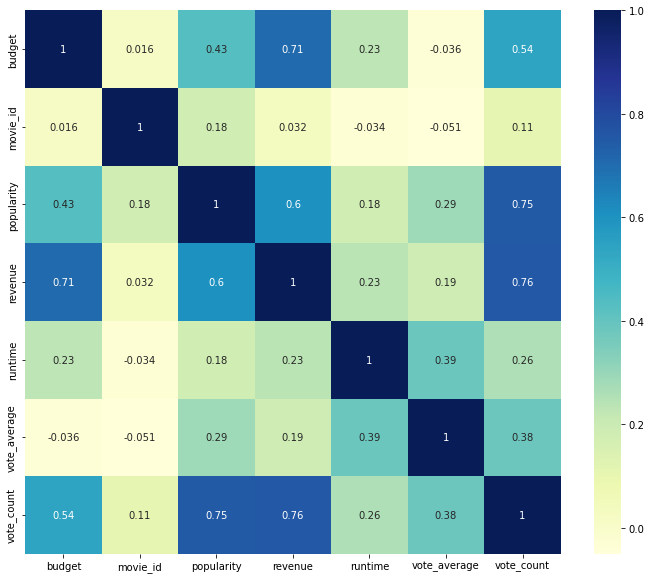

In [31]:
# Create the correlation matrix
corr = df.corr()

# Create the figure and adjust the size
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="YlGnBu", ax=ax)

# Show the plot
plt.show()


## Relationships between data

The strong positive correlation between budget and revenue (0.71) suggests that increasing the budget is likely to increase revenue generated. This information can be useful for the business strategy team when considering how to allocate resources for future projects.

The strong positive correlation between popularity and revenue (0.60) and the moderate positive correlation between vote_count and revenue (0.54) suggest that both popularity and vote count play a role in determining the revenue generated. This information can be useful for the business strategy team when considering how to market their projects to increase popularity and generate more votes.

The weak positive correlation between budget and runtime (0.23) suggests that longer movies may require more budget to produce, but this relationship is not very strong. This information may not have a significant impact on the business strategy team's decision-making.

The correlation matrix provides valuable insights into which variables have the strongest impact on revenue generated. By understanding the relationships between budget, popularity, vote count, and revenue, the strategy team can make more informed decisions on how to allocate resources and market their projects to maximize revenue generated.

## To better understand the relationships between the variables, we can proceed with the following steps:

1. Plot scatter plots between the variables with strong positive correlations (budget and revenue, popularity and revenue, vote_count and revenue, popularity and vote_count) to visualize the linearity of the relationships and identify any outliers that may impact the correlation.

2. Conduct simple linear regression analyses between budget and revenue, popularity and revenue, vote_count and revenue to determine the strength of the relationships and assess the potential of these variables to predict revenue.

3. Plot a scatter plot between budget and runtime to visualize the relationship between the two variables and examine if there is a clear linear pattern. If a pattern exists, conduct a simple linear regression analysis to determine the strength of the relationship and evaluate the potential of budget to predict runtime.

By performing these steps, we can gain a deeper understanding of the relationships between the variables and how they may impact revenue generation. This information will be useful for informing business strategy and making data-driven decisions.

#### Function Description: plot_transformations
The function below takes in a dataframe (df), and two fields (x_field and y_field) that correspond to the x-axis and y-axis variables in the plot, respectively. The function creates a 2x2 plot of scatter plots using the seaborn library, with each subplot representing a different transformation of the original x and y variables.

The first subplot shows the original values of x_field vs. y_field. The second subplot shows the log transformed values of x_field and y_field, which are calculated by taking the log of each value. The third subplot shows the reciprocal transformed values of x_field and y_field, which are calculated by taking the reciprocal of each value. The fourth subplot shows the square root transformed values of x_field and y_field, which are calculated by taking the square root of each value.

The purpose of this function is to visualize the relationships between x_field and y_field and determine if different transformations may help improve the relationship between the variables. The different transformations allow the user to observe how the relationship between the variables may change and potentially improve the linearity of the relationship, making it easier to conduct regression analysis.

In [32]:
def plot_transformations(df, x_field, y_field):
    fig, ax = plt.subplots(2, 2, figsize=(15, 15))

    # Plot original values
    sns.scatterplot(x=x_field, y=y_field, data=df, alpha=0.5, ax=ax[0][0])
    ax[0][0].set_title(f'{x_field} vs. {y_field}')
    ax[0][0].set_xlabel(x_field)
    ax[0][0].set_ylabel(y_field)
    
    # Create log transformed fields
    df[f'{x_field}_log'] = np.log(df[x_field])
    df[f'{y_field}_log'] = np.log(df[y_field])
    
    # Plot log transformed values
    sns.scatterplot(x=f'{x_field}_log', y=f'{y_field}_log', data=df, alpha=0.5, ax=ax[0][1])
    ax[0][1].set_title(f'{x_field}_log vs. {y_field}_log')
    ax[0][1].set_xlabel(f'{x_field}_log')
    ax[0][1].set_ylabel(f'{y_field}_log')
    
    # Create reciprocal transformed fields
    df[f'{x_field}_recip'] = 1/df[x_field]
    df[f'{y_field}_recip'] = 1/df[y_field]
    
    # Plot reciprocal transformed values
    sns.scatterplot(x=f'{x_field}_recip', y=f'{y_field}_recip', data=df, alpha=0.5, ax=ax[1][0])
    ax[1][0].set_title(f'{x_field}_recip vs. {y_field}_recip')
    ax[1][0].set_xlabel(f'{x_field}_recip')
    ax[1][0].set_ylabel(f'{y_field}_recip')
    
    # Create square root transformed fields
    df[f'{x_field}_sqrt'] = np.sqrt(df[x_field])
    df[f'{y_field}_sqrt'] = np.sqrt(df[y_field])

    # Plot square root transformed values
    sns.scatterplot(x=f'{x_field}_sqrt', y=f'{y_field}_sqrt', data=df, alpha=0.5, ax=ax[1][1])



In [33]:
df.head(1)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage  movie_id  \
0  http://www.avatarmovie.com/     19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   

                       tagline   title  vote_average  vote_count  
0  Enter the World of Pandora.  Avatar           7.2       11800

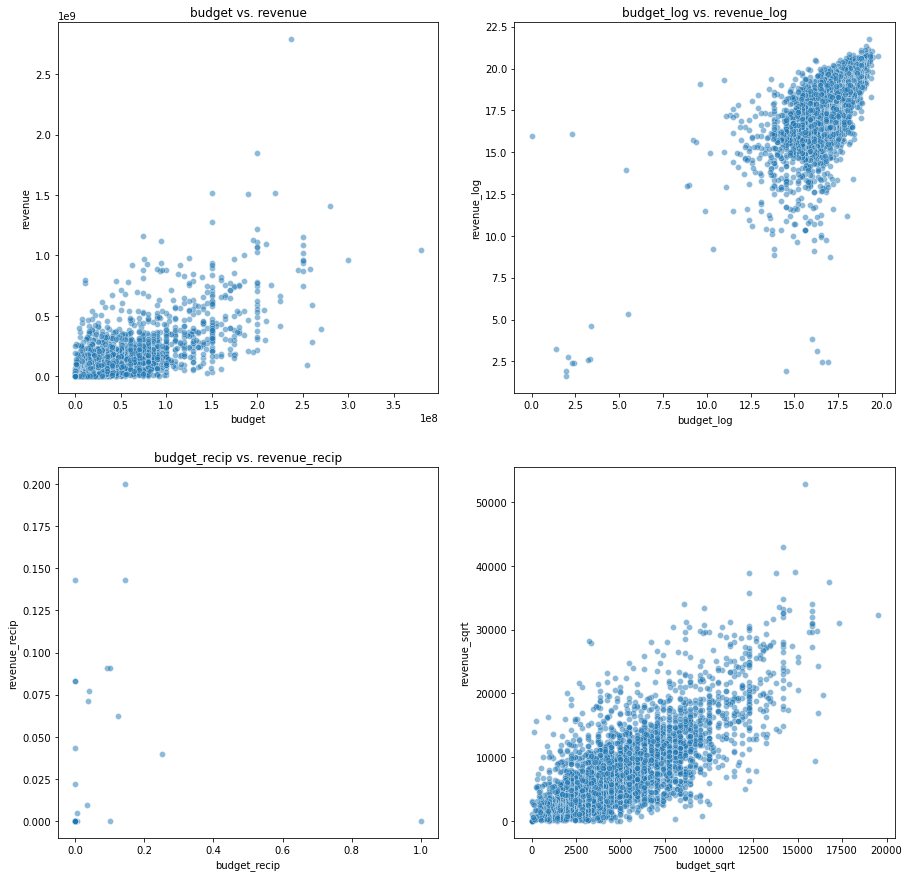

In [34]:
plot_transformations(df, 'budget', 'revenue')

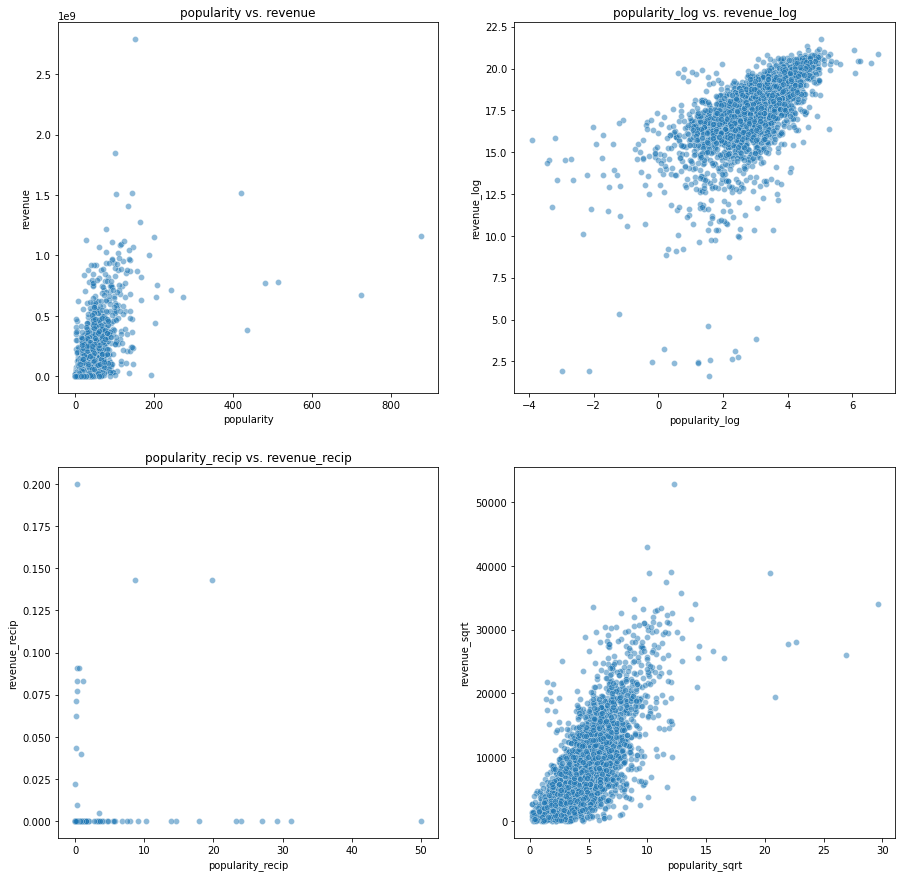

In [35]:
plot_transformations(df, 'popularity', 'revenue')

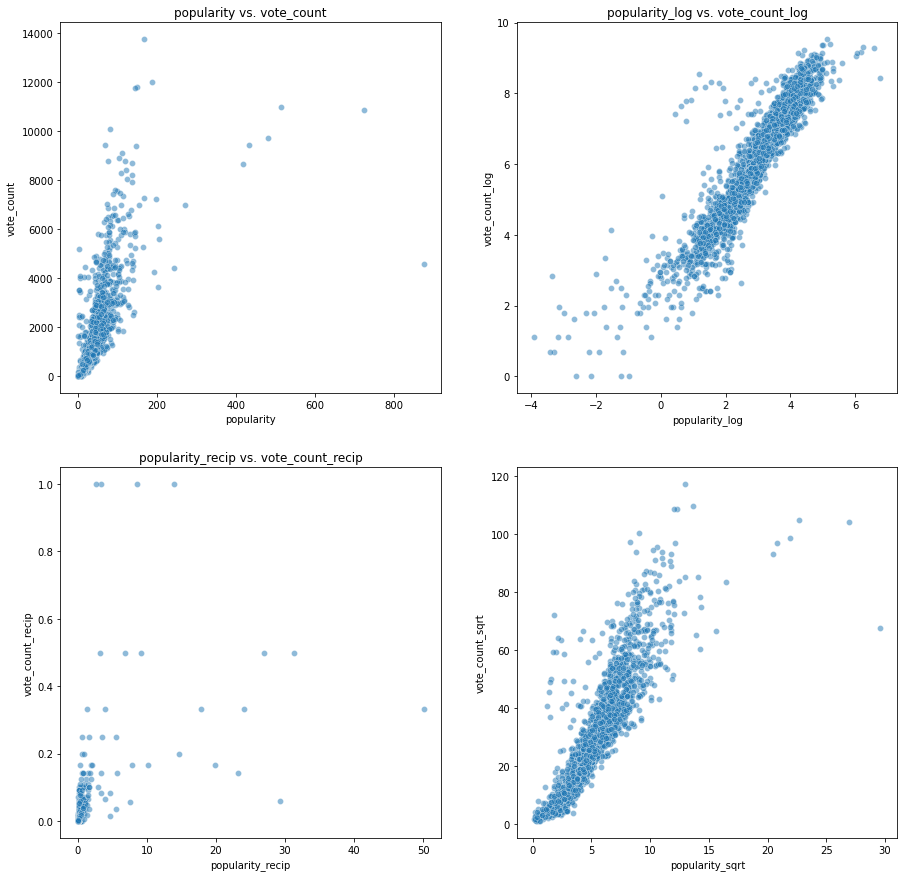

In [36]:
plot_transformations(df, 'popularity', 'vote_count')

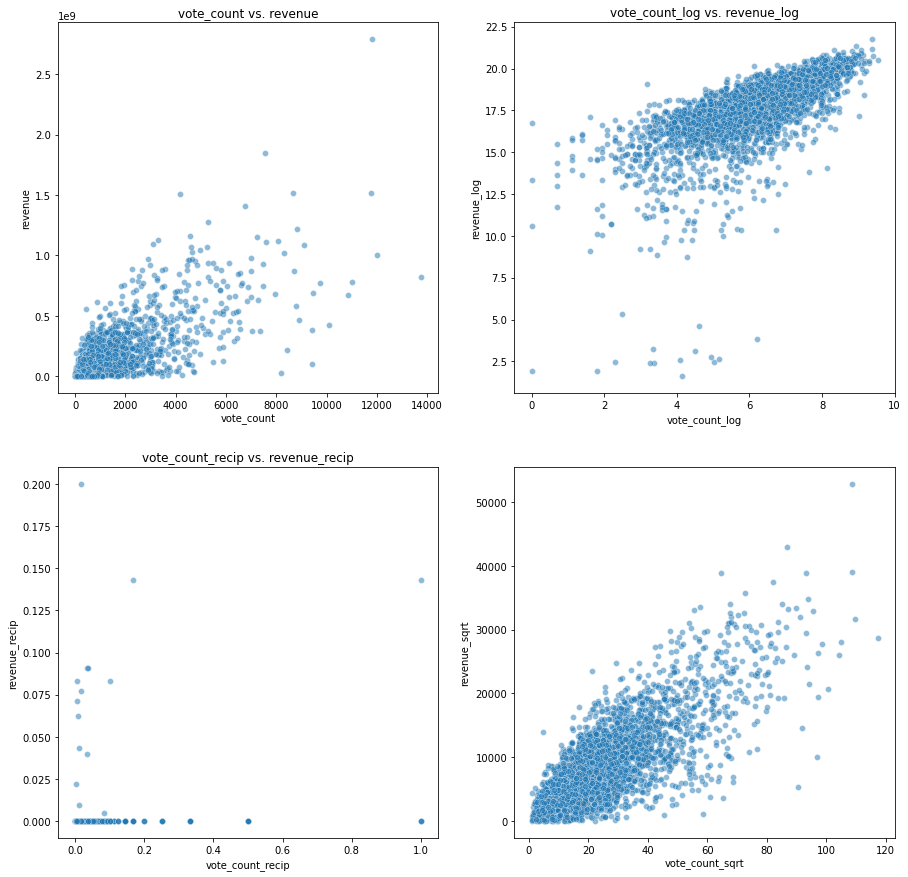

In [37]:
plot_transformations(df, 'vote_count', 'revenue')

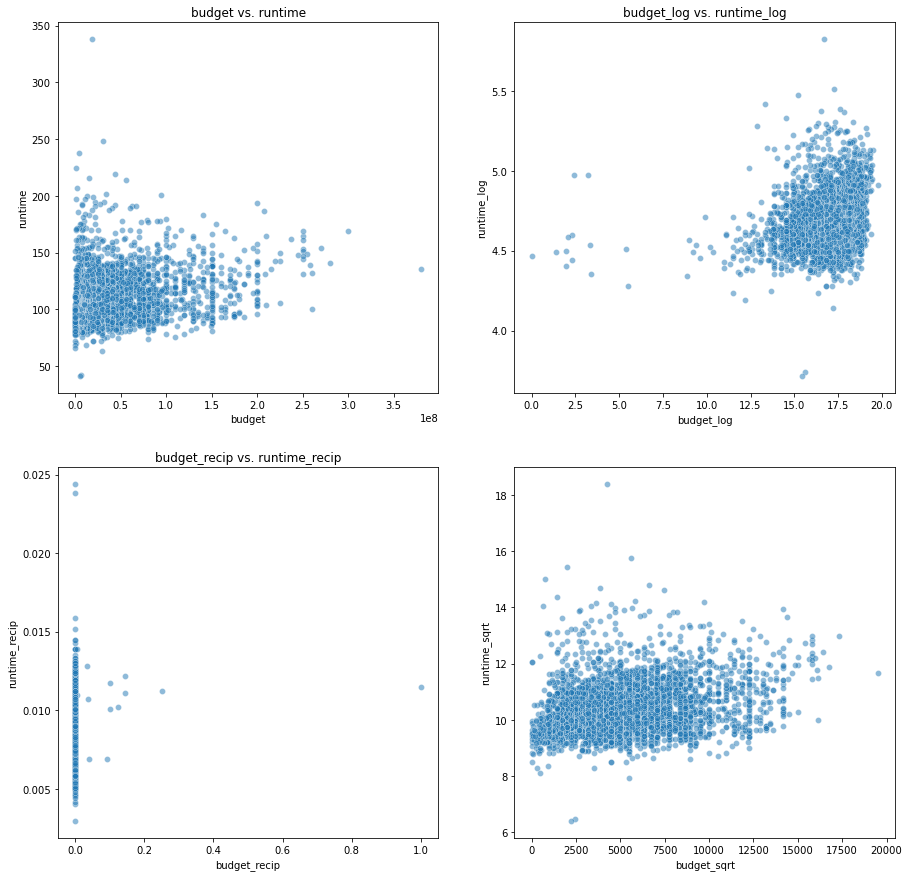

In [38]:
plot_transformations(df, 'budget', 'runtime')

## Regression analysis on the transformed fields 

In order to understand the relationship between different variables and revenue, regression analysis is conducted on the transformed fields. This is because some variables may not have a linear relationship with the target variable, but may have a non-linear relationship that can be captured by transforming the variables. By conducting regression analysis on transformed variables, it may be possible to capture these non-linear relationships and improve the accuracy of the predictions.

Conduct a simple linear regression analysis between budget and revenue, popularity and revenue, vote_count and revenue to determine the strength of the relationships and whether these variables can be used to predict revenue.

#### Function Description: plot_linear_regression

The plot_linear_regression function is a visualization tool used to perform simple linear regression analysis. Given a dataframe df and two fields x_field and y_field, the function first creates a scatter plot of the two fields using the sns.scatterplot method. The plot is stored in a figure with two subplots, with x_field on the x-axis and y_field on the y-axis. The title of the plot is set to x_field vs. y_field.

The function then performs a simple linear regression analysis using the stats.linregress method and plots the regression line on the first subplot. The line equation, correlation coefficient (r), and p-value are also displayed on the plot.

Finally, the function creates a residuals plot by performing a linear regression analysis using the smf.ols method and plotting the residuals of the model against the x_field variable. The residuals plot is stored in the second subplot and has the title 'Residuals plot', with x_field on the x-axis and the residuals of y_field on the y-axis. 

In [39]:
def plot_linear_regression(df, x_field, y_field):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))

    # Plot original values
    sns.scatterplot(x=x_field, y=y_field, data=df, alpha=0.5, ax=ax[0])
    ax[0].set_title(f'{x_field} vs. {y_field}')
    ax[0].set_xlabel(x_field)
    ax[0].set_ylabel(y_field)

    # Perform simple linear regression analysis
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_field], df[y_field])
    line = f'regression line: y={intercept:.2f}+{slope:.2f}x, r={r_value:.2f}, p={p_value:.2f}'
    ax[0].plot(df[x_field], slope * df[x_field] + intercept, '-', color='red', linewidth=2)
    ax[0].text(0.05, 0.95, line, transform=ax[0].transAxes, fontsize=14, verticalalignment='top')
    
    # Plot residuals
    model = smf.ols(formula=f'{y_field} ~ {x_field}', data=df)
    results = model.fit()
    sns.scatterplot(x=x_field, y=results.resid, data=df, alpha=0.5, ax=ax[1])
    ax[1].set_title('Residuals plot')
    ax[1].set_xlabel(x_field)
    ax[1].set_ylabel(f'residuals ({y_field})')
    ax[1].axhline(y=0, color='red', linewidth=2)

#### Function Description: linear_regression_transformations
The function linear_regression_transformations takes as input a dataframe (df), and two columns x_field and y_field. The purpose of the function is to apply various mathematical transformations to the x_field and y_field data, and then perform linear regression analysis to determine the best transformation for the data based on the R-squared value.

The function starts by defining a list of transformations, each of which is a tuple containing a string name for the transformation and a lambda function to perform the transformation. The transformations include 'original', 'log', 'reciprocal', and 'square root'.

The function then initializes several variables to keep track of the best transformation and the best R-squared value. The function then loops over the transformations and performs the following steps for each transformation:

Copies the original dataframe
Applies the current transformation to the x_field and y_field columns in the copy of the dataframe
Performs linear regression analysis on the transformed data and calculates the R-squared value
Plots the transformed data and residuals and saves the R-squared value for each transformation
If the current R-squared value is higher than the previous highest R-squared value, the function updates the best transformation and best R-squared value
After looping over all transformations, the function prints the best transformation and the best R-squared value.

In [40]:
def linear_regression_transformations(df, x_field, y_field):
    transformations = [
        ('original', lambda x: x),
        ('log', lambda x: np.log(x)),
        ('reciprocal', lambda x: 1/x),
        ('square root', lambda x: np.sqrt(x))
    ]

    r_squared_values = []
    best_transformation = None
    best_r_squared = 0
    
    for i, (transformation_name, transformation) in enumerate(transformations):
        transformed_df = df.copy()
        transformed_df[[x_field, y_field]] = transformed_df[[x_field, y_field]].apply(transformation)

        fig, ax = plt.subplots(1, 2, figsize=(15, 5))

        # Plot transformed values
        sns.scatterplot(x=x_field, y=y_field, data=transformed_df, alpha=0.5, ax=ax[0])
        ax[0].set_title(f'{x_field} vs. {y_field} ({transformation_name})')
        ax[0].set_xlabel(x_field)
        ax[0].set_ylabel(y_field)

        # Perform simple linear regression analysis
        slope, intercept, r_value, p_value, std_err = stats.linregress(transformed_df[x_field], transformed_df[y_field])
        r_squared = r_value**2

        
        line = f'regression line: y={intercept:.2f}+{slope:.2f}x, r={r_value:.2f}, p={p_value:.2f}'
        ax[0].plot(transformed_df[x_field], slope * transformed_df[x_field] + intercept, '-', color='red', linewidth=2)
        ax[0].text(0.05, 0.95, line, transform=ax[0].transAxes, fontsize=14, verticalalignment='top')

        # Plot residuals
        model = smf.ols(formula=f'{y_field} ~ {x_field}', data=transformed_df)
        results = model.fit()
        sns.scatterplot(x=x_field, y=results.resid, data=transformed_df, alpha=0.5, ax=ax[1])
        ax[1].set_title('Residuals plot')
        ax[1].set_xlabel(x_field)
        ax[1].set_ylabel(f'residuals ({y_field})')
        ax[1].axhline(y=0, color='red', linewidth=2)
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(transformed_df[x_field], transformed_df[y_field])
        r_squared = r_value**2
        
        r_squared_values.append(r_squared)

        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_transformation = transformation_name
        
        print(f'{x_field} vs. {y_field} ({transformation_name})' " R-squared value: ", r_squared)
    print("\n")
    print("Best transformation: ", best_transformation)
    print("Best R-squared value: ", best_r_squared)
        


budget vs. revenue (original) R-squared value:  0.49745681050480756
budget vs. revenue (log) R-squared value:  0.43166056423366556
budget vs. revenue (reciprocal) R-squared value:  0.05350404813487128
budget vs. revenue (square root) R-squared value:  0.515375784925235


Best transformation:  square root
Best R-squared value:  0.515375784925235


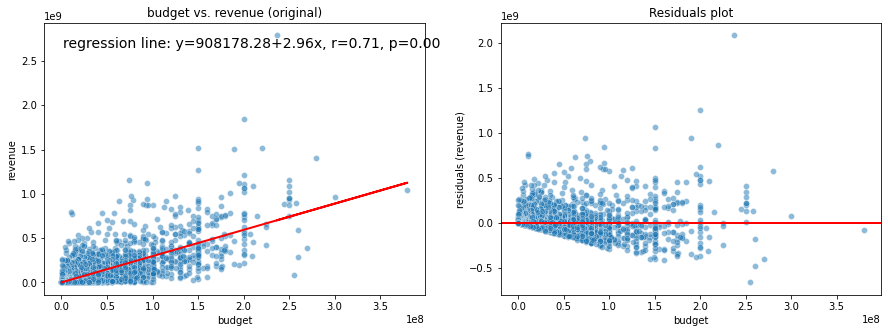

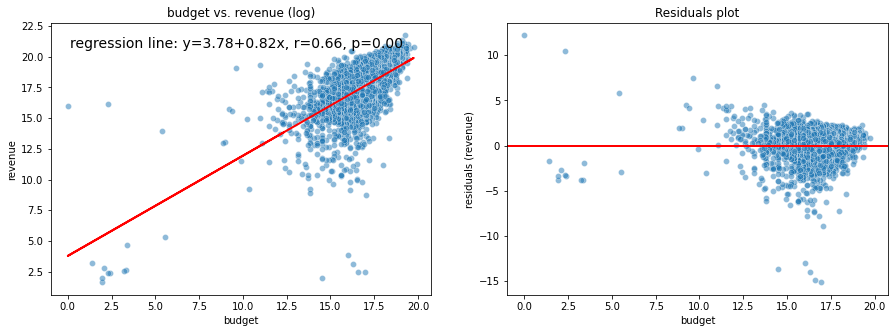

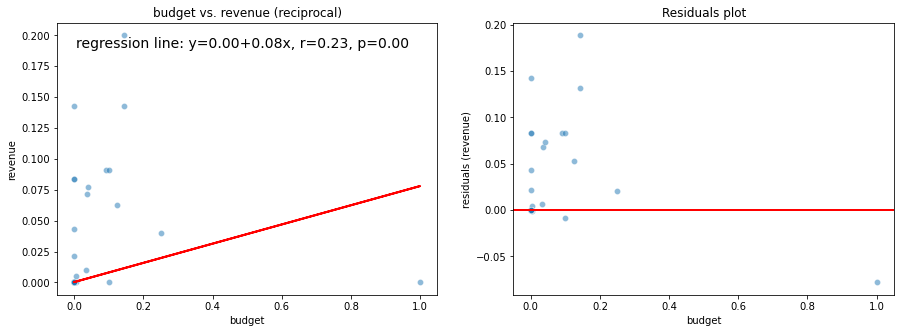

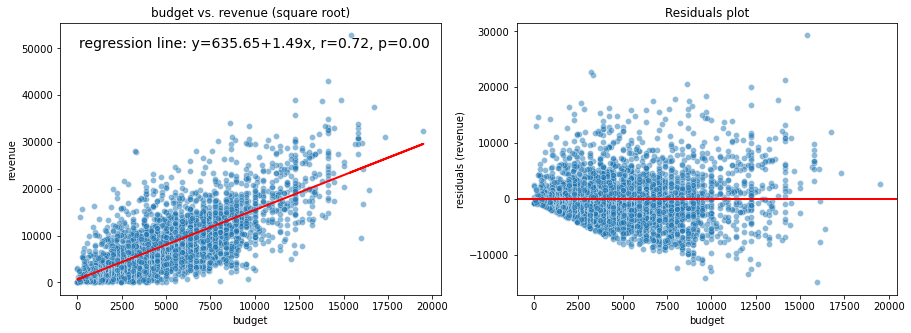

In [41]:
linear_regression_transformations(df, 'budget', 'revenue')

revenue vs. vote_count (original) R-squared value:  0.5717518587743012
revenue vs. vote_count (log) R-squared value:  0.4431753167072093
revenue vs. vote_count (reciprocal) R-squared value:  0.03576215380549573
revenue vs. vote_count (square root) R-squared value:  0.605168474061958


Best transformation:  square root
Best R-squared value:  0.605168474061958


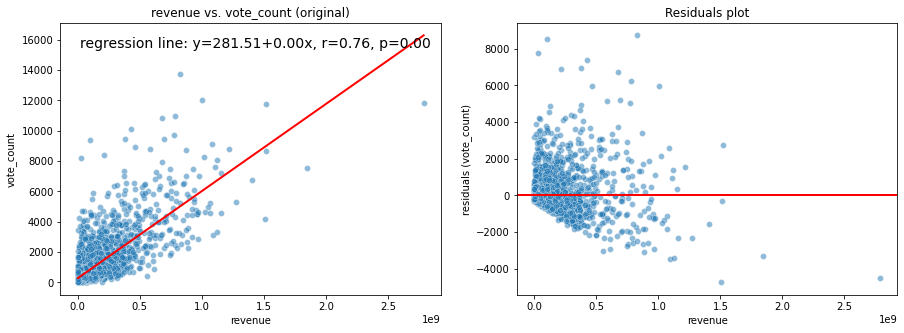

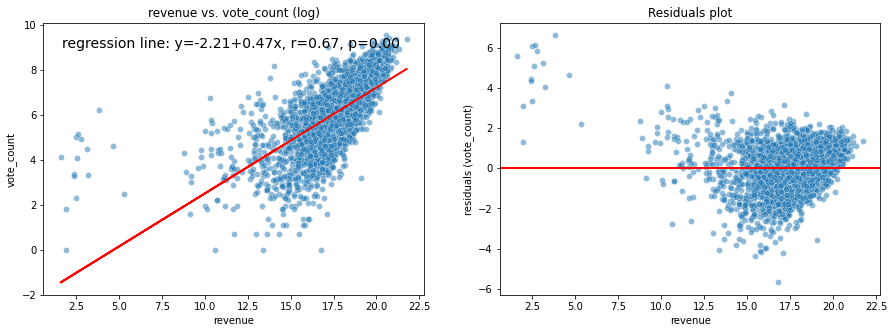

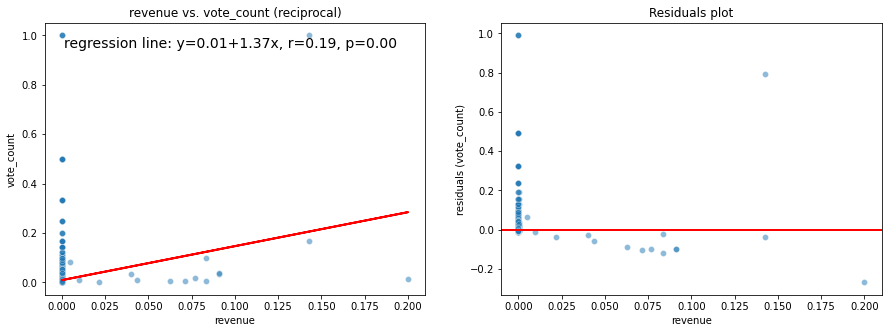

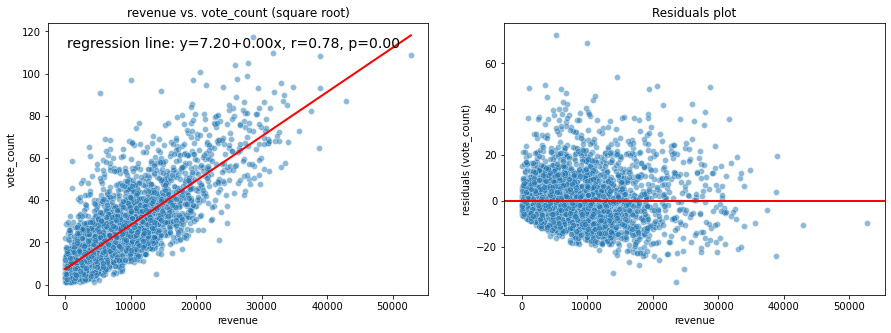

In [42]:
linear_regression_transformations(df, 'revenue', 'vote_count')


revenue vs. popularity (original) R-squared value:  0.36255073871742316
revenue vs. popularity (log) R-squared value:  0.39154600162832864
revenue vs. popularity (reciprocal) R-squared value:  0.01675925455268553
revenue vs. popularity (square root) R-squared value:  0.5035103892805505


Best transformation:  square root
Best R-squared value:  0.5035103892805505


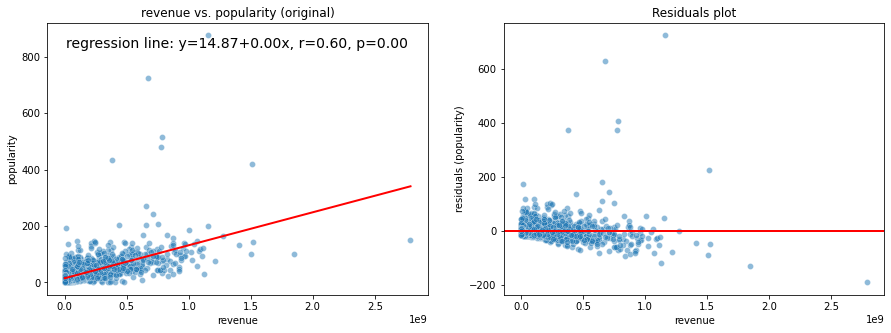

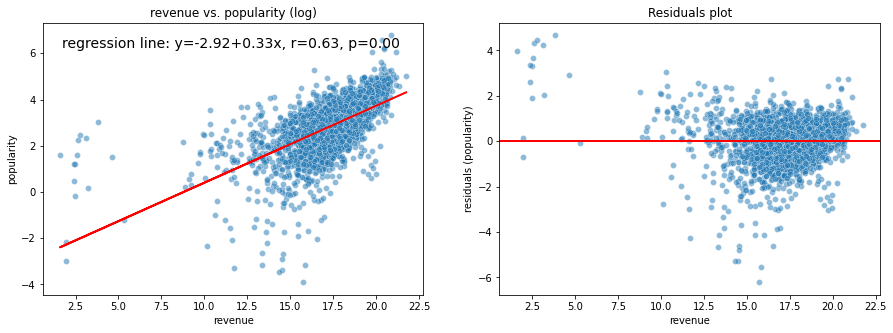

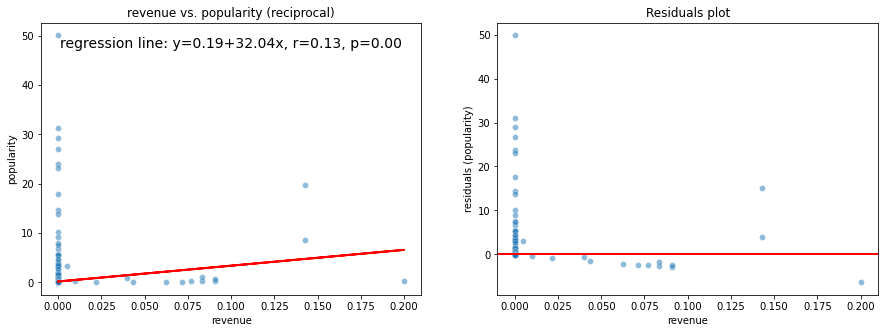

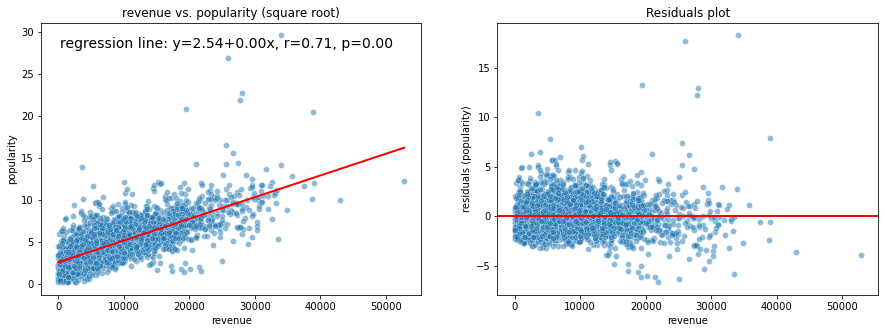

In [43]:

linear_regression_transformations(df, 'revenue', 'popularity')

revenue vs. runtime (original) R-squared value:  0.0543992040993428
revenue vs. runtime (log) R-squared value:  0.04293362302574639
revenue vs. runtime (reciprocal) R-squared value:  0.0012994410380087148
revenue vs. runtime (square root) R-squared value:  0.05811334506472342


Best transformation:  square root
Best R-squared value:  0.05811334506472342


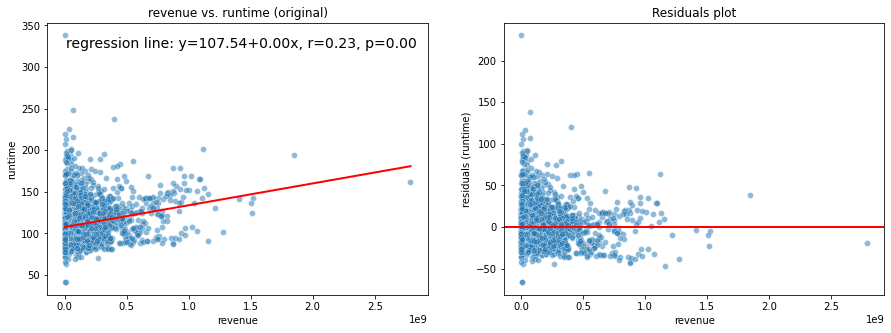

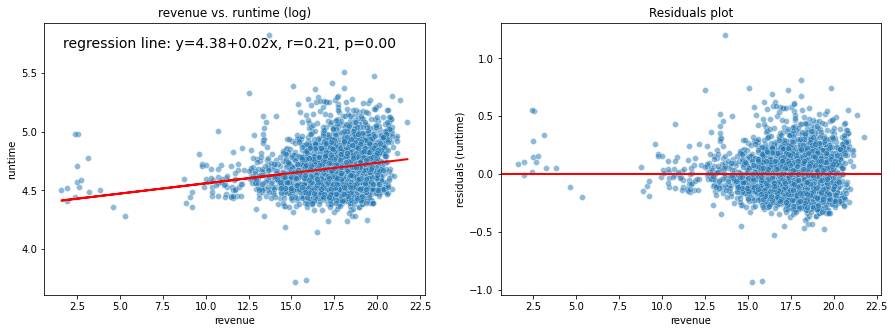

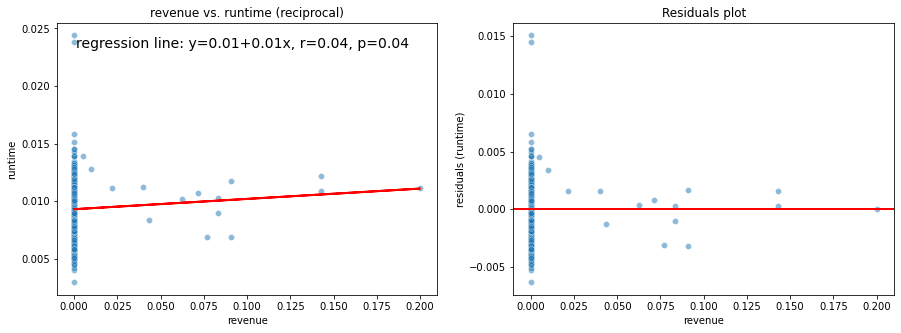

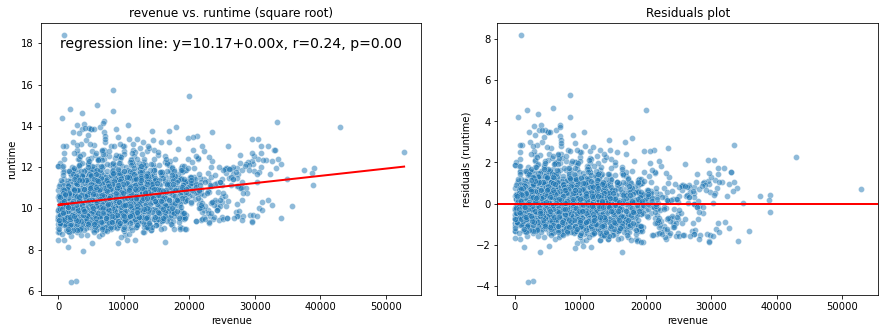

In [44]:
linear_regression_transformations(df, 'revenue', 'runtime')

In [45]:
df.head(1)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage  movie_id  \
0  http://www.avatarmovie.com/     19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  ...  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   

   revenue_sqrt popularity_log  popularity_recip  popularity_sqrt  \
0  52801.184523       5.013548          0.006647          12.2653   

  vote_count_log vote_count_recip vote_count_sqrt runtime_log  runtime_recip  \
0       9.375855         0.000085      108.627805    5.087596       0.006173   

   runtime_sqrt  
0     12.727922  

[1 rows x 35 columns]

### DATA CHECKPOINT
The code below performs a data checkpoint by overwriting the original data frame df with df_copy. This is done to ensure that any changes made to df in previous sections do not impact the original, clean version of the data stored in df_copy. By overwriting df with df_copy, the code creates a fresh starting point for subsequent data analysis and manipulation.

In [46]:
df = df_copy


## One Hot Encoding

One hot encoding is a technique used to convert categorical variables into a numerical format so that machine learning algorithms can understand and process the data. This technique is used when the categorical variables have multiple categories and the categories are not ordered. It will convert the categorical variables into multiple binary columns, one for each category.

One hot encoding is useful for various reasons, such as:

- Improving the performance of machine learning algorithms.
- Reducing the risk of introducing bias into the model.
- Improving interpretability of the model.
- Allowing for better handling of categorical variables in the data.

### Extracting Cast and Crew information from df1

The code is creating two separate dataframes: df_cast and df_crew, by splitting the original dataframe df1 into two separate dataframes based on the 'cast' and 'crew' columns. The code creates a new dataframe which contains the movie_id, title, and cast/crew information, by exploding the cast/crew column. The 'explode' method splits the values in the 'cast' column into multiple rows, so that each row represents a separate cast member. 

In [47]:

# Split the 'cast' column into a new table
df_cast = df1.explode('cast').reset_index(drop=True)
df_cast = df_cast[['movie_id', 'title', 'cast']]

# Split the 'crew' column into a new table
df_crew = df1.explode('crew').reset_index(drop=True)
df_crew = df_crew[['movie_id', 'title', 'crew']]


### Function Description
This is a function for creating a histogram. The function takes in two inputs, 'df' and a string 'y' representing the column name in the DataFrame. The function performs the following steps:

1. Count the frequency of each category in the column specified by 'y'
2. Take the top 10 categories with the highest frequency
3. Filter the original DataFrame 'df' to only include the top 10 categories
4. Plot a histogram using the filtered DataFrame and the seaborn 'countplot' method. The x-axis is the top 10 categories in the column 'y', and the y-axis is the frequency of those categories.
5. The appearance of the plot is customized with various seaborn and matplotlib methods, including setting the style, rotation of the x-axis labels, and adding labels, title, and font size to the x-axis and y-axis.

In [48]:
def create_histogram_sns(df, y):
    # Count the frequency of each category
    counts = df[y].value_counts()

    # Take the top 10 categories
    top_10_categories = counts.index[:10]

   # Filter the dataframe to only include the top 10 categories
    df_filtered = df[df[y].isin(top_10_categories)].sort_values(y, ascending=False)
    
    plt.figure(figsize=(10,7))
    sns.set_style("darkgrid")
    sns.countplot(x=y, data=df_filtered, linewidth=0.25, palette='colorblind', order=top_10_categories)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.xlabel(y, fontsize=15)
    plt.xticks(fontsize=14)
    plt.ylabel('Frequency', fontsize=15)
    plt.title(f'Top 10 {y} Categories', fontsize=20)
    plt.show()

### Function Description
This function extract_info takes in 4 parameters: df, column_name which is the name of the column to be extracted, id_field which is the field that is used as an identifier for the movies, and num_names which is an optional parameter for the number of names to be extracted. If num_names is set to a numeric value, the function will only retrieve the first rows defined by num_names. 

The function performs the following steps:

1. Initialize empty lists for movie_id, name, department, job, and position
2. Loop through each row in the input dataframe, df
3. Within the loop, load the contents of the column_name column as a JSON string and assign it to data.
4. For each member in data, retrieve the name, department, and job information, and append it to the relevant lists.
5. The extracted information is then stored in a pandas DataFrame and returned.

In [49]:
def extract_info(df, column_name, id_field, num_names=None):
    movie_id = []
    name = []
    department = []
    job = []
    position = []
    
    for i in range(len(df)):
        try:
            row = df.iloc[i]
            data = json.loads(row[column_name].replace("'", "\""))
            
            for j, data_member in enumerate(data):
                if num_names is not None and j >= num_names:
                    break
                movie_id.append(row[id_field])
                name.append(data_member['name'])
                department.append(data_member.get('department', None))
                job.append(data_member.get('job', None))
                position.append(j+1)
    
        except json.JSONDecodeError:
            pass
    
    extracted_df = pd.DataFrame({
        'movie_id': movie_id,
        'position': position,
        'name': name,
        'department': department,
        'job': job

    })
    
    return extracted_df

#df_genres_extracted = extract_info(df, 'genres','movie_id')
#df_keywords_extracted = extract_info(df, 'keywords', 'movie_id')
#df_production_companies_extracted = extract_info(df, 'production_companies', 'movie_id')
#df_cast_extracted = extract_info(df1, 'cast', 'movie_id')
#df_crew_extracted = extract_info(df1, 'crew', 'movie_id')



### Function Description
The function top_n_extract_info takes in two dataframes, df and df1, and an optional parameter num_names. The function calls the extract_info function five times with different parameters, to extract information from the 'genres', 'keywords', 'production_companies', 'cast' and 'crew' columns in the dataframes df and df1. In each call, the extract_info function takes in a dataframe, a column name, and an ID field, and returns a new dataframe with the extracted information. The num_names parameter sets a limit on the number of items to extract from each column, if it is provided. The function returns the five dataframes created from the extract_info function.

In [50]:
def top_n_extract_info(df, df1, num_names=None):
    df_genres_extracted_top_n = extract_info(df, 'genres', 'movie_id', num_names)
    df_keywords_extracted_top_n = extract_info(df, 'keywords', 'movie_id', num_names)
    df_production_companies_extracted_top_n = extract_info(df, 'production_companies', 'movie_id', num_names)
    df_cast_extracted_top_n = extract_info(df1, 'cast', 'movie_id', num_names)
    df_crew_extracted_top_n = extract_info(df1, 'crew', 'movie_id', num_names)
    
    return df_genres_extracted_top_n, df_keywords_extracted_top_n, df_production_companies_extracted_top_n, df_cast_extracted_top_n, df_crew_extracted_top_n


In [51]:
df_genres_extracted_top_n, df_keywords_extracted_top_n, df_production_companies_extracted_top_n, df_cast_extracted_top_n, df_crew_extracted_top_n = top_n_extract_info(df, df1)

Create the dataframes with no constraint on the data included.

In [52]:
df_genres_extracted = df_genres_extracted_top_n
df_keywords_extracted = df_keywords_extracted_top_n
df_production_companies_extracted = df_production_companies_extracted_top_n
df_cast_extracted = df_cast_extracted_top_n
df_crew_extracted = df_crew_extracted_top_n

In [166]:
import os

# Create the 'capstone_data' directory if it does not exist
if not os.path.exists('capstone_data'):
    os.makedirs('capstone_data')

# Write the DataFrames to CSV files in the 'capstone_data' directory
df_genres_extracted_top_n.to_csv('capstone_data/df_genres_extracted.csv', index=False)
df_keywords_extracted_top_n.to_csv('capstone_data/df_keywords_extracted.csv', index=False)
df_production_companies_extracted_top_n.to_csv('capstone_data/df_production_companies_extracted.csv', index=False)
df_cast_extracted_top_n.to_csv('capstone_data/df_cast_extracted.csv', index=False)
df_crew_extracted_top_n.to_csv('capstone_data/df_crew_extracted.csv', index=False)


In [53]:
df_production_companies_extracted.head(3)

movie_id  position                                    name department   job
0     19995         1                 Ingenious Film Partners       None  None
1     19995         2  Twentieth Century Fox Film Corporation       None  None
2     19995         3                      Dune Entertainment       None  None

In [54]:
df_genres_extracted.head(3)

movie_id  position       name department   job
0     19995         1     Action       None  None
1     19995         2  Adventure       None  None
2     19995         3    Fantasy       None  None

In [55]:
df_cast_extracted.head(3)

movie_id  position             name department   job
0     49529         1    Taylor Kitsch       None  None
1     49529         2     Lynn Collins       None  None
2     49529         3  Samantha Morton       None  None

In [56]:
df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage  movie_id  \
0                   http://www.avatarmovie.com/     19995   
1  http://disney.go.com/disneypictures/pirates/       285   
2   http://www.sonypictures.com/movies/spectre/    206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

In [57]:
df_crew_extracted.head(3)

movie_id  position               name  department                      job
0       285         1     Dariusz Wolski      Camera  Director of Photography
1       285         2     Gore Verbinski   Directing                 Director
2       285         3  Jerry Bruckheimer  Production                 Producer

In [58]:
df_keywords_extracted.head(3)

movie_id  position           name department   job
0     19995         1  culture clash       None  None
1     19995         2         future       None  None
2     19995         3      space war       None  None

In [59]:
mask = (df_crew_extracted['job'] == 'Producer') | (df_crew_extracted['job'] == 'Director')
df_filtered_crew_extracted = df_crew_extracted[mask]

# DESTINATION

### Function Description
This function takes in df, the name of a column to group by (groupby_column), the name of the column to count (count_column), and a new name for the column (new_col_name). It performs the following operations:

Groups the data in the DataFrame by the values in the "groupby_column".
Counts the number of occurrences of the "count_column" for each group.
Resets the index of the resulting data and converts it to a DataFrame.
Renames the count column to the specified "new_col_name".
Sorts the data by the new column in descending order.
The function returns the final DataFrame containing the counts of the "count_column" for each group.

In [60]:
def count_entries_per_movie(df, groupby_column, count_column, new_col_name):
    count_per_movie = df.groupby(groupby_column).count()
    count_per_movie = count_per_movie[count_column]
    count_per_movie = count_per_movie.to_frame().reset_index()
    count_per_movie.rename(columns={count_column: new_col_name}, inplace=True)
    count_per_movie.sort_values(by=new_col_name, ascending=False, inplace=True)
    return count_per_movie


This code is counting the number of entries per movie in the following dataframes:

- df_cast_extracted: This dataframe contains information about the cast in each movie
- df_production_companies_extracted: This dataframe contains information about the production companies involved in each movie
- df_genres_extracted: This dataframe contains information about the genres of each movie

The code creates six dataframes with the count of entries for each movie:

- actors_per_movie: The number of actors per movie
- movies_per_companie: The number of movies per production company
- companies_per_movie: The number of production companies per movie
- genres_per_movie: The number of genres per movie
- movies_per_actor: The number of movies per actor
- movies_per_production_company: The number of movies per production company


In [61]:
actors_per_movie = count_entries_per_movie(df_cast_extracted, "movie_id", "name", "actor_count")
movies_per_companie = count_entries_per_movie(df_production_companies_extracted, "name", "movie_id","count_of_prod_comp")
companies_per_movie = count_entries_per_movie(df_production_companies_extracted, "movie_id", "name", "count_of_prod_comp")
genres_per_movie = count_entries_per_movie(df_genres_extracted, "movie_id", "name", "count_of_genres")
movies_per_actor = count_entries_per_movie(df_cast_extracted,  "name", "movie_id", "movie_count")
movies_per_production_company = count_entries_per_movie(df_production_companies_extracted,  "name", "movie_id", "movie_count")

In [62]:
movies_per_actor.head(5)

name  movie_count
18839  Samuel L. Jackson           26
17763    Richard Jenkins           25
3349    Catherine Keener           22
21978    William H. Macy           21
413         Alec Baldwin           21

# Analysis Note
This code is filtering the top 1500 actors based on the number of movies they have acted in. It first gets the top 1500 actors from the list of movies per actor. Then, it filters the original dataframe of cast information to only include the top 1500 actors. Finally, it groups the remaining data by movie_id, while keeping the first value of movie_id for each group. The final dataframe df_top_actors now only includes information about the top 1500 actors and the movies they have acted in.

In [63]:
top_n = 1500
#top_n = 750

top_cast = movies_per_actor.head(top_n)['name'].tolist()

df_top_actors = df_cast_extracted[df_cast_extracted['name'].isin(top_cast)]
df_top_actors = df_top_actors.groupby(['movie_id'], as_index=False).agg({'movie_id': 'first'})
df_top_actors.head(3)

movie_id
0         5
1        12
2        33

In [64]:
# get the top 10 production companies
top_10_production_companies = movies_per_production_company.sort_values(by='movie_count', ascending=False).head(10)['name'].tolist()
top_10_production_companies

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'New Line Cinema',
 'Relativity Media',
 'Walt Disney Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'Touchstone Pictures']

In [65]:
df_cast_extracted.head(1)

movie_id  position           name department   job
0     49529         1  Taylor Kitsch       None  None

In [66]:
df_production_companies_extracted.head(1)

movie_id  position                     name department   job
0     19995         1  Ingenious Film Partners       None  None

This code is selecting the top 500 production companies based on the number of movies they have produced, as calculated by the count_entries_per_movie function. It then filters the dataframe df_production_companies_extracted to only include the movies produced by these top 500 companies. The filtered data is then grouped by the movie_id column and aggregated to only keep the first occurrence of each movie_id. The resulting dataframe df_top_companies contains only the movie_id of the movies produced by the top 500 companies.

In [67]:
top_n = 500
top_companies = movies_per_companie.head(top_n)['name'].tolist()

df_top_companies = df_production_companies_extracted[df_production_companies_extracted['name'].isin(top_companies)]
df_top_companies = df_top_companies.groupby(['movie_id'], as_index=False).agg({'movie_id': 'first'})
df_top_companies.head(3)

movie_id
0         5
1        11
2        12

In [68]:
movies_per_companie.head(3)

name  count_of_prod_comp
3348        Warner Bros.                 277
3243  Universal Pictures                 272
2311  Paramount Pictures                 242

In [69]:
actors_per_movie.head(3)

movie_id  actor_count
194       1577           87
1584     37903           84
112        700           83

In [70]:
companies_per_movie.head(3)

movie_id  count_of_prod_comp
5           16                  26
565       1951                  21
2033     22215                  18

In [71]:
genres_per_movie.head(3)

movie_id  count_of_genres
1752     12589                7
1977     17130                7
2590     62764                6

In [72]:
actors_per_movie.head(3)

movie_id  actor_count
194       1577           87
1584     37903           84
112        700           83

In [73]:
movies_per_actor.head(3)

name  movie_count
18839  Samuel L. Jackson           26
17763    Richard Jenkins           25
3349    Catherine Keener           22

### Analysis Decision Point

A thorough analysis was conducted to determine the optimal number of items to include in the models from lists of production roles (ranging from acting to producing). Given the massive size of the data set, the objective of the analysis was to maximize accuracy by only including roles that appeared in the first "top_n" rows of the metadata. This will help to increase accuracy of models built using this data.

The analysis was based on the histogram of actors' frequency of appearance in films. After considering different values for top_n (5, 10, 15, 20, 25, and 30), it was determined that the optimal value for top_n was 20.

As the value of top_n increased, a greater number of actors who typically appeared lower in film credits were included in the analysis. This was evident by the change in the order of actors as the value of top_n changed. For instance, when top_n was increased from 20 to 25, Robin Williams replaced Steve Buscemi as the 10th most frequently occurring actor, revealing that Robin Williams had been in more projects at a lower billing.

The code calls the function top_n_extract_info, passing two dataframes, df and df1, as well as top_n which is set to 20. This creates tables that include the first 20 rows of information extracted from their appropriate fields. The purpose of this code is to extract the most important information from the dataframes while limiting the number of irelevant items.

The function top_n_extract_info performs operations on the data and returns five dataframes, which are then assigned to the variables df_genres_extracted_top_n, df_keywords_extracted_top_n, df_production_companies_extracted_top_n, df_cast_extracted_top_n, and df_crew_extracted_top_n. This allows the code to effectively extract the necessary information while limiting the amount of data processed, thus maximizing efficiency.

### Note that this can be changed to update the output of the models. It allows you to specify the number of variables used in the analysis

In [74]:
df_genres_extracted_top_n, df_keywords_extracted_top_n, df_production_companies_extracted_top_n, df_cast_extracted_top_n, df_crew_extracted_top_n = top_n_extract_info(df, df1, 20)


In [75]:
df_crew_extracted_top_n.head(1)

movie_id  position            name department                      job
0       285         1  Dariusz Wolski     Camera  Director of Photography

In [76]:

df_genres_extracted_top_n.head(3)

movie_id  position       name department   job
0     19995         1     Action       None  None
1     19995         2  Adventure       None  None
2     19995         3    Fantasy       None  None

In [77]:
df_keywords_extracted_top_n.head(3)


movie_id  position           name department   job
0     19995         1  culture clash       None  None
1     19995         2         future       None  None
2     19995         3      space war       None  None

In [78]:
df_production_companies_extracted_top_n.head(3)

movie_id  position                                    name department   job
0     19995         1                 Ingenious Film Partners       None  None
1     19995         2  Twentieth Century Fox Film Corporation       None  None
2     19995         3                      Dune Entertainment       None  None

In [79]:
df_cast_extracted_top_n.head(3)


movie_id  position             name department   job
0     49529         1    Taylor Kitsch       None  None
1     49529         2     Lynn Collins       None  None
2     49529         3  Samantha Morton       None  None

In [80]:
df_crew_extracted_top_n.head(3)


movie_id  position               name  department                      job
0       285         1     Dariusz Wolski      Camera  Director of Photography
1       285         2     Gore Verbinski   Directing                 Director
2       285         3  Jerry Bruckheimer  Production                 Producer

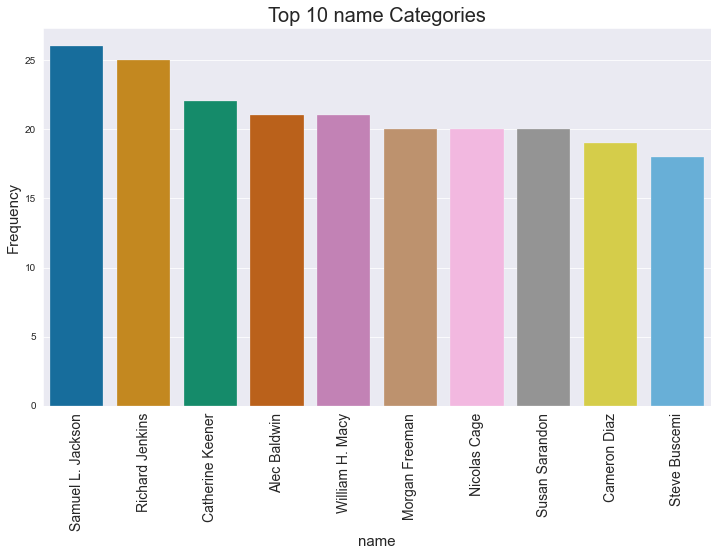

In [81]:
create_histogram_sns(df_cast_extracted_top_n, 'name')


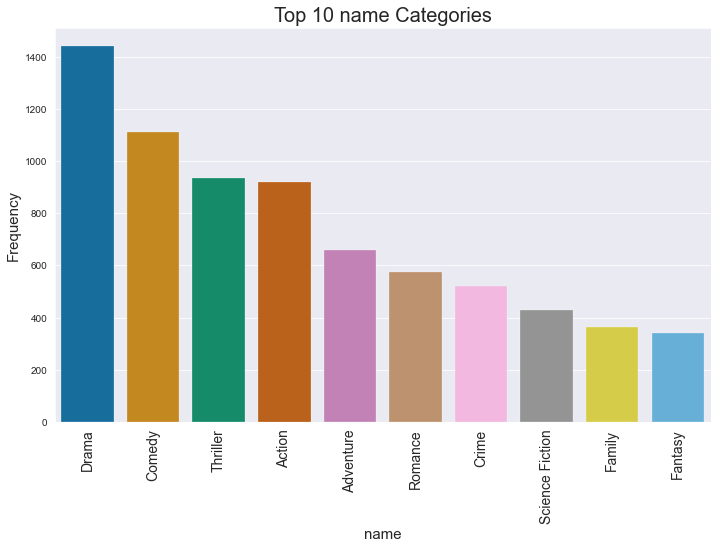

In [82]:
create_histogram_sns(df_genres_extracted_top_n, 'name')

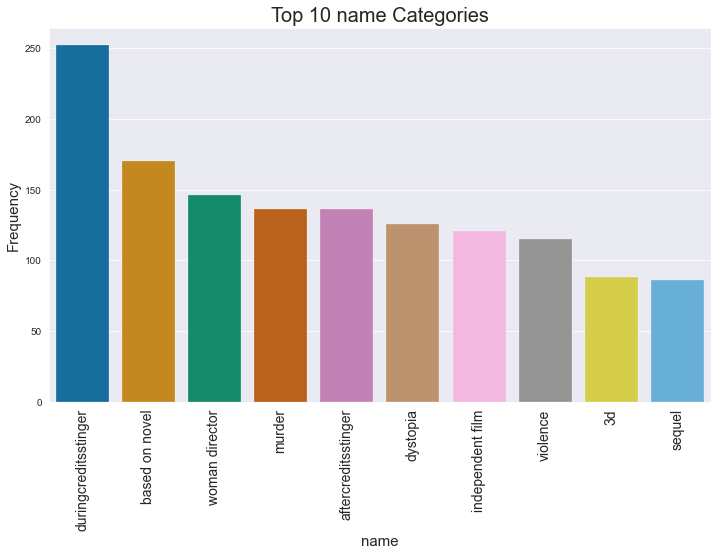

In [83]:
create_histogram_sns(df_keywords_extracted_top_n, 'name')

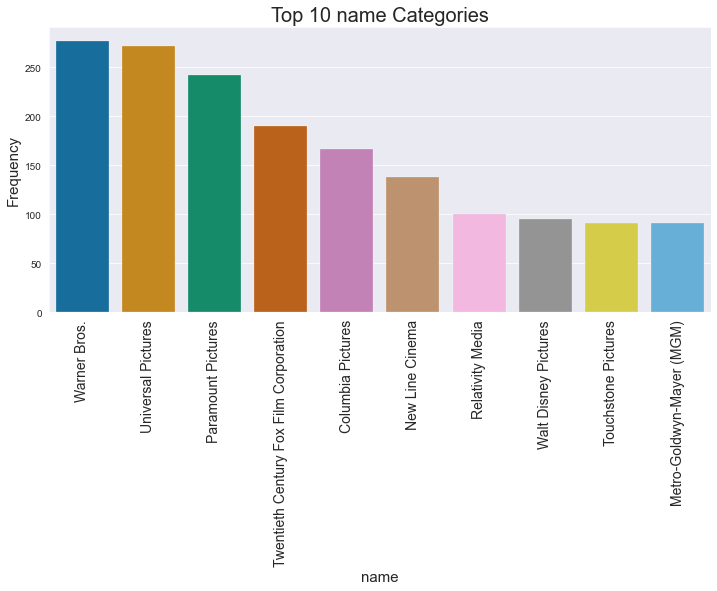

In [84]:
create_histogram_sns(df_production_companies_extracted_top_n, 'name')

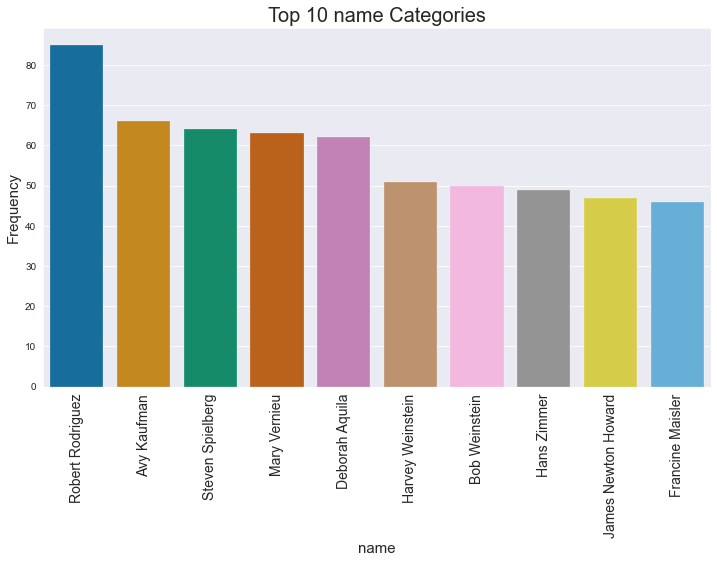

In [85]:
create_histogram_sns(df_crew_extracted_top_n, 'name')

### Feature Engineering

The code given above continues the process of data analysis by performing feature engineering on the data. The code starts by copying the original data frame into a new data frame named df_1. This is done to ensure that the original data remains unchanged.



The code also adds columns for the day of the year, a categorization of the release day into "month_start", "month_mid", or "month_end", and the season in which the film was released. Additionally, a column named profitability_percentage is created to store the profitability percentage of each film, and another column named profitability_category is added to categorize the films based on their profitability percentage. The categorization is done using the np.where function which allows for multiple conditions to be checked and for the appropriate category to be assigned based on the result of those conditions.

This feature engineering process involves creating new columns in the dataframe to extract and analyze information about the movie releases. The new columns contain information such as the release month and day, profitability, profitability percentage, and season of release. The profitability of a movie is determined by subtracting the budget from the revenue and categorizing the result as "yes" or "no" based on whether the movie made a profit or not. The profitability percentage is also calculated and categorized into different categories such as "Major Loss", "Medium Loss", "Barely Breaking Even", etc. The release month is also further divided into categories such as the start, middle, and end of the month. Additionally, the season of release is categorized into seasons such as winter, spring, summer, and fall.

Create new columns in df_1 to store information about the release month, release day, and profitability of each film. For example, the code adds a column named release_month that stores the month in which each film was released, and another column named profitable which stores a categorical variable indicating whether the film was profitable or not.

In [86]:
# Copy the original dataframe to a new dataframe
df_1 = df.copy()

# Add three new columns to store the release month, day, and day of year
df_1['release_month'] = df['release_date'].dt.month
df_1['release_day'] = df['release_date'].dt.day
df_1['release_dayofyear'] = df_1['release_date'].dt.dayofyear

# Create a new column to categorize the release day into 'month_start', 'month_mid', or 'month_end'
month_category = []
for day in df_1['release_day']:
    if day <= 10:
        month_category.append('month_start')
    elif day <= 21:
        month_category.append('month_mid')
    else:
        month_category.append('month_end')
df_1['month_category'] = month_category

# Create a new column to indicate if the movie was profitable
df_1['profitable'] = df['revenue'] - df['budget']
df_1['profitable'] = df_1['profitable'].apply(lambda x: 'yes' if x > 0 else 'no')

# Create a new column to store the season in which the movie was released
seasons = []
for month in df['release_date'].dt.month:
    if month in [12, 1, 2]:
        seasons.append('Winter')
    elif month in [3, 4, 5]:
        seasons.append('Spring')
    elif month in [6, 7, 8]:
        seasons.append('Summer')
    else:
        seasons.append('Fall')
df_1['Season'] = seasons

# Get the earliest record
earliest_record = df_1['release_date'].min()

# Create a new column to store the difference between each record and the earliest record
df_1['time_since_earliest'] = df_1['release_date'] - earliest_record


In [87]:
df_1['profitability_percentage'] = (df_1['revenue'] - df_1['budget'])/df_1['budget']
df_1['profitability_category'] = np.where(df_1['profitability_percentage'] < -0.25, 'Major Loss',
np.where((df_1['profitability_percentage'] >= -0.25) & (df_1['profitability_percentage'] < 0.1), 'Medium Loss',

np.where((df_1['profitability_percentage'] >= 0.1) & (df_1['profitability_percentage'] < 0.75), 'Barely Breaking Even',
np.where((df_1['profitability_percentage'] >= 0.75) & (df_1['profitability_percentage'] < 1.5), 'Small Success',
np.where((df_1['profitability_percentage'] >= 1.5) & (df_1['profitability_percentage'] < 2.5), 'Success',
np.where((df_1['profitability_percentage'] >= 2.5) & (df_1['profitability_percentage'] < 5.0), 'Big Success','Hit'))))))

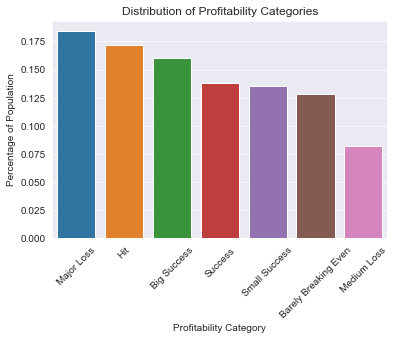

In [88]:

# Calculate the frequency of each category in profitability_category
freq = df_1['profitability_category'].value_counts(normalize=True)

# Plot the frequency as a bar chart
sns.barplot(x=freq.index, y=freq.values)

# Add a title and axis labels
plt.title("Distribution of Profitability Categories")
plt.xlabel("Profitability Category")
plt.xticks(rotation=45) # rotate the x axis labels for better readability
plt.ylabel("Percentage of Population")

# Show the plot
plt.show()

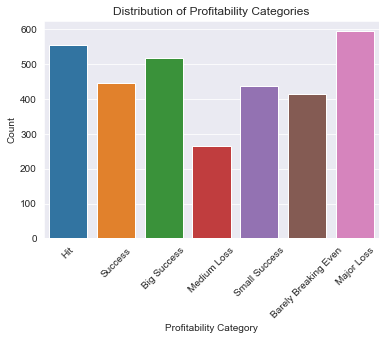

In [89]:
sns.countplot(x='profitability_category', data=df_1)

# Add a title and axis labels
plt.title("Distribution of Profitability Categories")
plt.xlabel("Profitability Category")
plt.xticks(rotation=45) # rotate the x axis labels for better readability
plt.ylabel("Count")

# Show the plot
plt.show()

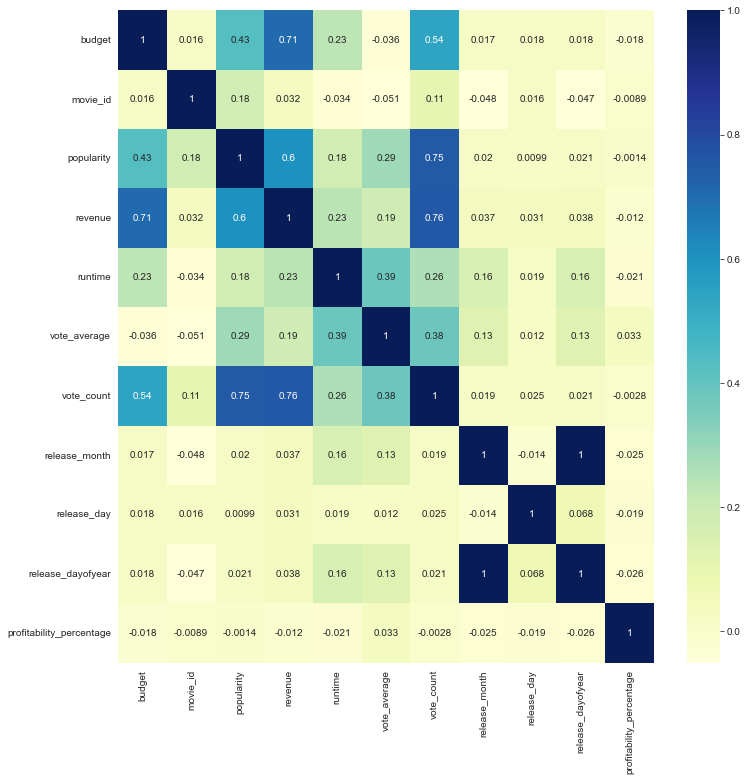

In [90]:
# Create the correlation matrix
corr = df_1.corr()

# Create the figure and adjust the size
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="YlGnBu", ax=ax)

# Show the plot
plt.show()

In [91]:
df_1.head(1)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage  movie_id  \
0  http://www.avatarmovie.com/     19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  ...  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   

  vote_count release_month  release_day  release_dayofyear month_category  \
0      11800            12           10                344    month_start   

  profitable  Season time_since_earliest  profitability_percentage  \
0        yes  Winter          34065 days                 10.763566   

   profitability_category  
0                     Hit  

[1 rows x 29 columns]

# Function Description
The function cross_tab_heatmap is used to create a cross-tabulation of two fields (columns) in a given dataframe. The function takes three arguments, the dataframe, field1, and field2. The first argument is the dataframe which will be used to create the cross-tabulation. The second argument is the first field that will be used as the rows in the cross-tabulation, and the third argument is the second field that will be used as the columns in the cross-tabulation.

In [92]:
def cross_tab_heatmap(df, field1, field2):
    ctab = pd.crosstab(index=df[field1], columns=df[field2])
    plt.figure(figsize=(16,5))
    sns.heatmap(ctab, annot=True, cmap="YlGnBu", annot_kws={"size": 11},fmt="d")
    plt.title("Cross-Tabulation of " + field1 + " and " + field2, fontsize=18)
    plt.xlabel(field2, fontsize=14)
    plt.ylabel(field1, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

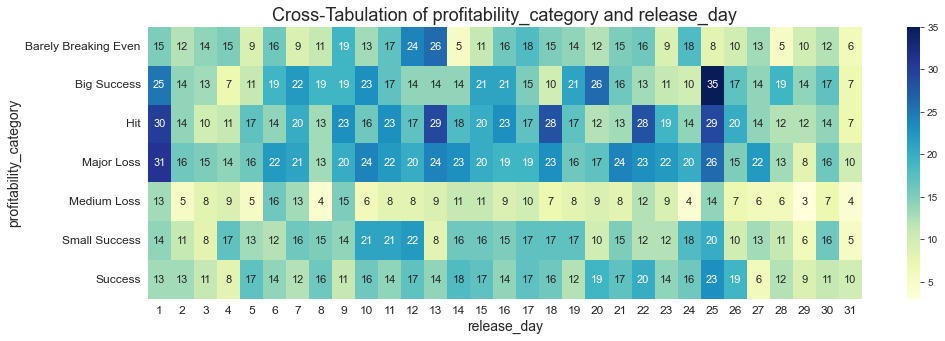

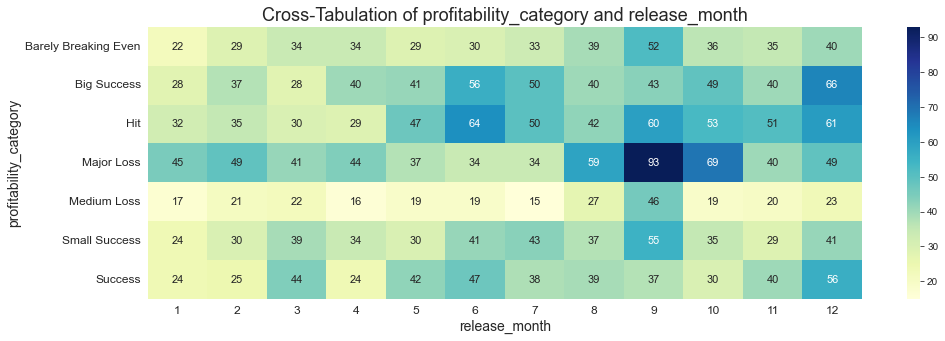

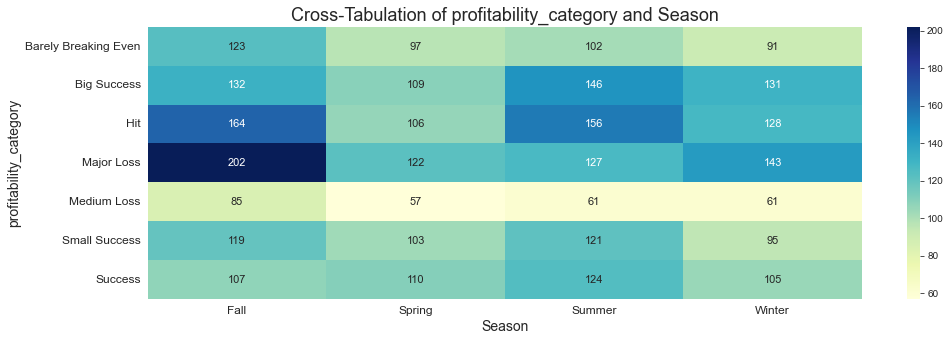

In [93]:


categorical_fields = ['release_month', 'Season', 'profitable', 'profitability_category']
cross_tab_heatmap(df_1, 'profitability_category', 'release_day')
cross_tab_heatmap(df_1, 'profitability_category', 'release_month')
cross_tab_heatmap(df_1, 'profitability_category', 'Season')




The crosstabs show the count of movies in each profitability category based on their release day, release month, and season. Next steps for this Perform statistical tests to determine if there are any significant differences between the different categories of the target variable.


The crosstabs show the count of the number of films that fall into different profitability categories (such as "Barely Breaking Even", "Big Success", etc.) based on the day of the month that they were released, the month of release, and the season of release.

The crosstabs provide a high-level overview of how film profitability is affected by the timing of their release. By aggregating the data in this way, it is possible to identify trends and patterns that may help inform decision-making in the film industry. For example, the data shows that films tend to perform better in certain seasons or months and that there may be a relationship between the day of the week that a film is released and its profitability.



# Chi Squared

The chi i-squared test is a statistical test used to determine whether there is a significant association between two categorical variables. When you perform a chi-square test, you are testing the hypothesis that the two variables are independent of each other, that is, there is no relationship between them.

The test calculates a test statistic based on the difference between the observed and expected frequencies in a contingency table, and the resulting p-value is used to make a decision about the null hypothesis. If the p-value is less than a certain significance level (typically 0.05), you reject the null hypothesis and conclude that there is a significant association between the two variables.

In the context of the data you provided, if you perform a chi-square test, you will be able to determine if there is a significant association between the profitability of a movie and one or more of the categorical variables such as release day, release month, or season. The test will tell you if the distribution of the profitability of the movies is dependent on the values of the categorical variables, or if the association between the two is likely to have occurred by chance.

In [94]:

# Create contingency table
ctab = pd.crosstab(index=df_1['profitability_category'], columns=df_1['release_day'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ctab)

# Print results
print("Chi-squared test statistic: ", chi2)
print("p-value: ", p)


Chi-squared test statistic:  179.62662593332465
p-value:  0.4938327282140948


In [95]:
# Create contingency table
ctab = pd.crosstab(index=df_1['profitability_category'], columns=df_1['release_day'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ctab)

# Print results
print("Chi-squared test statistic: ", chi2)
print("p-value: ", p)

Chi-squared test statistic:  179.62662593332465
p-value:  0.4938327282140948


In [96]:
# Create contingency table
ctab = pd.crosstab(index=df_1['profitability_category'], columns=df_1['release_month'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ctab)

# Print results
print("Chi-squared test statistic: ", chi2)
print("p-value: ", p)

Chi-squared test statistic:  106.09369277433319
p-value:  0.0012795937663098531


In [97]:
# Create contingency table
ctab = pd.crosstab(index=df_1['profitability_category'], columns=df_1['Season'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ctab)

# Print results
print("Chi-squared test statistic: ", chi2)
print("p-value: ", p)

Chi-squared test statistic:  28.796510884514205
p-value:  0.050923416877803884


# Chi-squared analysis
- Profitability & Release Day:
The chi-squared test statistic is 179.62662593332465 and the p-value is 0.4938327282140948. The p-value is larger than 0.05 (the commonly used significance level), which means that there is not enough evidence to reject the null hypothesis. The null hypothesis is that there is no significant association between the profitability of a movie and the release day. In other words, the distribution of the profitability of movies does not depend on the release day.

- Profitability & Release Month:
The chi-squared test statistic is 106.09369277433319 and the p-value is 0.0012795937663098531. The p-value is smaller than 0.05, which means that there is enough evidence to reject the null hypothesis. The null hypothesis is that there is no significant association between the profitability of a movie and the release month. In other words, the distribution of the profitability of movies depends on the release month.

- Profitability & Release Season:
The chi-squared test statistic is 28.796510884514205 and the p-value is 0.050923416877803884. The p-value is close to 0.05, which means that the results are inconclusive. The p-value is not small enough to reject the null hypothesis, but also not large enough to accept the null hypothesis. In this case, further analysis is required to draw a conclusion.

# Profitabiliity & Release Month Next Steps 

This information can help the business make informed decisions on when to release their movies in order to maximize profits. With this information the business can for example: 
- Schedule future releases in the best month, use this information to tailor their marketing and advertising strategies based on the best time to release a movie,
- Provide valuable insights into the factors that contribute to a movie's success and help the business optimize their operations.

In [98]:
# Get the earliest record
earliest_record = df_1['release_date'].min()

# Create a new column to store the difference between each record and the earliest record
df_1['time_since_earliest'] = df_1['release_date'] - earliest_record

In [99]:
df_production_companies_extracted

movie_id  position                                    name department  \
0         19995         1                 Ingenious Film Partners       None   
1         19995         2  Twentieth Century Fox Film Corporation       None   
2         19995         3                      Dune Entertainment       None   
3         19995         4                Lightstorm Entertainment       None   
4           285         1                    Walt Disney Pictures       None   
...         ...       ...                                     ...        ...   
10042      2292         2                  View Askew Productions       None   
10043       692         1                   Dreamland Productions       None   
10044     36095         1                           Daiei Studios       None   
10045     14337         1                               Thinkfilm       None   
10046      9367         1                       Columbia Pictures       None   

        job  
0      None  
1      None  
2      None  
3      None  
4      None  
...     ...  
10042  None  
10043  None  
10044  None  
10045  None  
10046  None  

[10047 rows x 5 columns]

In [100]:
df_3d = df_1[['profitability_percentage','movie_id', 'release_date']]
df_3d.head()

profitability_percentage  movie_id release_date
0                 10.763566     19995   2009-12-10
1                  2.203333       285   2007-05-19
2                  2.594590    206647   2015-10-26
3                  3.339756     49026   2012-07-16
4                  0.092843     49529   2012-03-07

### One Hot Encoding

#### Function Description

The function one_hot_encode_and_clean is designed to clean and transform a specified column in a given dataframe into a one-hot encoded format. The function takes two arguments, the dataframe and the column to be transformed. The dataframe argument is the dataframe containing the column to be transformed, while the column argument is the name of the column to be transformed. The function first removes all columns in the dataframe that are not relevant by using the drop method. Then, it uses the get_dummies method to one-hot encode the specified column. Finally, the function groups the data by the 'movie_id' column and sums the values, then returns the resulting dataframe.

In [101]:
def one_hot_encode_and_clean(df, col):
    col_1 = col
    # Remove all non-relevant columns
    df_t = df.drop(columns=[col for col in df.columns if col not in ['movie_id', col_1]])
    # One-hot encode the specified column
    df_one_hot = pd.get_dummies(df_t, columns=[col], prefix=col)
    # Group the data by 'movie_id' and sum the values
    df_one_hot = df_one_hot.groupby('movie_id').sum().reset_index()
    return df_one_hot


The one_hot_encode_and_clean function will be applied to the following dataframes: 
- df_crew_extracted_top_n_one_hot
- df_production_companies_extracted_top_n_one_hot
- df_cast_extracted_top_n_one_hot
- df_genres_extracted_top_n_one_hot
- df_keywords_extracted_top_n_one_hot. 

This function will one-hot encode the specified column in each of these dataframes, then group the data by 'movie_id' and sum the values. The resulting dataframes will have the 'movie_id' as the index, with columns representing the one-hot encoded values of the original columns.

In [102]:
df_crew_extracted_top_n_one_hot = one_hot_encode_and_clean(df_crew_extracted_top_n, 'name')
df_crew_extracted_top_n_one_hot.head(3)

movie_id  name_\tMak Tin-Shu  name_ Ivan Vorlíček  name_50 Cent  \
0        11                   0                    0             0   
1        12                   0                    0             0   
2        19                   0                    0             0   

   name_A L Katz  name_A. A. Milne  name_A. Arnold Gillespie  \
0              0                 0                         0   
1              0                 0                         0   
2              0                 0                         0   

   name_A. Earl Hedrick  name_A. Kitman Ho  name_A. Klimenko  ...  \
0                     0                  0                 0  ...   
1                     0                  0                 0  ...   
2                     0                  0                 0  ...   

   name_Émilie Simon  name_Éric Besnard  name_Éric Tessier  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   

   name_Étienne Faure  name_Íñigo Marco  name_Óscar Abades  name_Óscar Faura  \
0                   0                 0                  0                 0   
1                   0                 0                  0                 0   
2                   0                 0                  0                 0   

   name_Óscar Figueroa  name_Борис Стругацкий  name_张立 | Zhang Li  
0                    0                      0                   0  
1                    0                      0                   0  
2                    0                      0                   0  

[3 rows x 21318 columns]

In [103]:
df_production_companies_extracted_top_n_one_hot = one_hot_encode_and_clean(df_production_companies_extracted_top_n, 'name')
df_production_companies_extracted_top_n_one_hot.head(3)

movie_id  name_"DIA" Productions GmbH & Co. KG  name_1.85 Films  \
0         5                                     0                0   
1        11                                     0                0   
2        12                                     0                0   

   name_100 Bares  name_1019 Entertainment  name_10th Hole Productions  \
0               0                        0                           0   
1               0                        0                           0   
2               0                        0                           0   

   name_120dB Films  name_1492 Pictures  name_1818  name_1821 Pictures  ...  \
0                 0                   0          0                   0  ...   
1                 0                   0          0                   0  ...   
2                 0                   0          0                   0  ...   

   name_chateau productions  name_d-rights  name_double A Films  name_icon  \
0                         0              0                    0          0   
1                         0              0                    0          0   
2                         0              0                    0          0   

   name_platinum studios  name_thefyzz  name_thinkfilm  name_uFilm  \
0                      0             0               0           0   
1                      0             0               0           0   
2                      0             0               0           0   

   name_warner bross Turkey  name_Österreichischer Rundfunk (ORF)  
0                         0                                     0  
1                         0                                     0  
2                         0                                     0  

[3 rows x 3470 columns]

In [104]:
df_cast_extracted_top_n

movie_id  position                 name department   job
0         49529         1        Taylor Kitsch       None  None
1         49529         2         Lynn Collins       None  None
2         49529         3      Samantha Morton       None  None
3         49529         4         Willem Dafoe       None  None
4         49529         5  Thomas Haden Church       None  None
...         ...       ...                  ...        ...   ...
33268    126186         1        Daniel Henney       None  None
33269    126186         2          Eliza Coupe       None  None
33270    126186         3          Bill Paxton       None  None
33271    126186         4            Alan Ruck       None  None
33272    126186         5           Zhu Shimao       None  None

[33273 rows x 5 columns]

# Analysis Note 
The code is filtering the original dataframe of cast information to only include the list of top 1500 actors from the list of movies per actor. The final dataframe df_cast_top_n_2 now only includes information about the top 1500 actors and the movies they have acted in.

In [105]:
df_cast_top_n_2 = df_cast_extracted_top_n[df_cast_extracted_top_n['name'].isin(top_cast)]
df_cast_top_n_2.head(3)

movie_id  position                 name department   job
2     49529         3      Samantha Morton       None  None
3     49529         4         Willem Dafoe       None  None
4     49529         5  Thomas Haden Church       None  None

In [106]:
df_cast_extracted_top_n_one_hot = one_hot_encode_and_clean(df_cast_top_n_2, 'name')
df_cast_extracted_top_n_one_hot.head(3)

movie_id  name_Aaron Eckhart  name_Aaron Yoo  name_Aasif Mandvi  \
0         5                   0               0                  0   
1        12                   0               0                  0   
2        33                   0               0                  0   

   name_Abigail Breslin  name_Adam Godley  name_Adam Goldberg  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     0                 0                   0   

   name_Adam Sandler  name_Adam Scott  name_Adrian Martinez  ...  \
0                  0                0                     0  ...   
1                  0                0                     0  ...   
2                  0                0                     0  ...   

   name_Yul Vazquez  name_Zac Efron  name_Zach Galifianakis  name_Zak Orth  \
0                 0               0                       0              0   
1                 0               0                       0              0   
2                 0               0                       0              0   

   name_Zane Holtz  name_Zeljko Ivanek  name_Zoe Kazan  name_Zoe Saldana  \
0                0                   0               0                 0   
1                0                   0               0                 0   
2                0                   0               0                 0   

   name_Zooey Deschanel  name_Zoë Kravitz  
0                     0                 0  
1                     0                 0  
2                     0                 0  

[3 rows x 1501 columns]

In [107]:
df_keywords_extracted_top_n_one_hot = one_hot_encode_and_clean(df_keywords_extracted_top_n, 'name')
df_keywords_extracted_top_n_one_hot.head(3)

movie_id  name_15th century  name_16th century  name_17th century  \
0        11                  0                  0                  0   
1        12                  0                  0                  0   
2        13                  0                  0                  0   

   name_18th century  name_1910s  name_1920s  name_1930s  name_1940s  \
0                  0           0           0           0           0   
1                  0           0           0           0           0   
2                  0           0           0           0           0   

   name_1950s  ...  name_zookeeper  name_zurich  name_   name_ flipping coin  \
0           0  ...               0            0       0                    0   
1           0  ...               0            0       0                    0   
2           0  ...               0            0       0                    0   

   name_ nosferatu  name_ strange noise  name_Γη  name_卧底肥妈  name_绝地奶霸  \
0                0                    0        0          0          0   
1                0                    0        0          0          0   
2                0                    0        0          0          0   

   name_超级妈妈  
0          0  
1          0  
2          0  

[3 rows x 8041 columns]

In [108]:
df_genres_extracted_top_n_one_hot = one_hot_encode_and_clean(df_genres_extracted_top_n, 'name')
df_genres_extracted_top_n_one_hot.head(3)

movie_id  name_Action  name_Adventure  name_Animation  name_Comedy  \
0         5            0               0               0            1   
1        11            1               1               0            0   
2        12            0               0               1            0   

   name_Crime  name_Documentary  name_Drama  name_Family  name_Fantasy  \
0           1                 0           0            0             0   
1           0                 0           0            0             0   
2           0                 0           0            1             0   

   name_Foreign  name_History  name_Horror  name_Music  name_Mystery  \
0             0             0            0           0             0   
1             0             0            0           0             0   
2             0             0            0           0             0   

   name_Romance  name_Science Fiction  name_Thriller  name_War  name_Western  
0             0                     0              0         0             0  
1             0                     1              0         0             0  
2             0                     0              0         0             0

In [109]:
# #make a dataframe for the movie_ids
# df_ids = df[['movie_id']]

# df_ids.head(3)

### Function Description
The function calculate_movies_percentage is used to calculate the percentage of movies that belong to a specific dataframe. The function takes two arguments, the first being a dataframe containing the one-hot encoded genre information and the second being a dataframe containing movie ids.

The function starts by filtering the one-hot encoded genre dataframe to only include the movies in the movie id dataframe (df_ids).

Next, the percentage of movies in the filtered dataframe is calculated by dividing the length of "df_filtered_1" by the length of "df_ids". The result is stored in the variable "percentage".

In [110]:
# One hot encoded fields need to be referenced against the original data
# This code creates a function that compares the list of one hot encoded films to the orginial list of films

def calculate_movies_percentage(df_one_hot_genres, df_ids):
    df_filtered_1 = df_one_hot_genres[df_one_hot_genres['movie_id'].isin(df_ids['movie_id'])]
    percentage = 100 * len(df_filtered_1) / len(df_ids)
    return percentage

In [111]:
calculate_movies_percentage(df_crew_extracted_top_n_one_hot, df_ids)

81.15897118066316

In [112]:
calculate_movies_percentage(df_production_companies_extracted_top_n_one_hot, df_ids)

97.21103191819027

In [113]:
calculate_movies_percentage(df_cast_extracted_top_n_one_hot, df_ids)

41.028819336845366

In [114]:
calculate_movies_percentage(df_keywords_extracted_top_n_one_hot, df_ids)

92.90362565850636

In [115]:
calculate_movies_percentage(df_crew_extracted_top_n_one_hot, df_ids)

81.15897118066316

The results of the function "calculate_movies_percentage" on each dataframe show that after filtering the data to only include the top 1500 actors, crew members, keywords, genres, and production companies, the resulting dataframes are smaller in size compared to the original dataset. This could impact the accuracy of the models that will be run using this data as a lot of information has been removed. This result highlights the trade-off between reducing the size of the dataset and preserving information for modeling.

## 3D Graphs

In this section we further inspect the top 10 production companies to see if we can identify any additional patterns. The following steps were taken to further inspect the top 10 production companies in our dataset:



- Creation of a 3-dimensional scatter plot to visualize the relationship between the production company, the release day of the year, and the logarithmic value of the profit, color-coded by production company.


- Creation of a 3-dimensional scatter plot to visualize the relationship between the production company, the time since the earliest release date, and the logarithmic value of the profit, color-coded by production company.

- Creation of a 3-dimensional scatter plot to visualize the relationship between the runtime, budget, and revenue of the movies, color-coded by production company.

- Creation of a 3-dimensional scatter plot to visualize the relationship between the production company, the release day of the year, and the logarithmic value of the profit, color-coded by production company.



In [116]:
movies_per_production_company.head(10)

name  movie_count
3348                            Warner Bros.          277
3243                      Universal Pictures          272
2311                      Paramount Pictures          242
3193  Twentieth Century Fox Film Corporation          190
664                        Columbia Pictures          167
2127                         New Line Cinema          138
2545                        Relativity Media          100
3338                    Walt Disney Pictures           95
1974               Metro-Goldwyn-Mayer (MGM)           91
3149                     Touchstone Pictures           91

In [117]:
# Filter the dataframe 'df_production_companies_extracted' to only include movie_ids in 'top_10_production_companies'
df_top_10 = df_production_companies_extracted[df_production_companies_extracted['name'].isin(top_10_production_companies)]

In [118]:
df_top_10.head(5)

movie_id  position                                    name department  \
1      19995         2  Twentieth Century Fox Film Corporation       None   
4        285         1                    Walt Disney Pictures       None   
7     206647         1                       Columbia Pictures       None   
11     49026         2                            Warner Bros.       None   
14     49529         1                    Walt Disney Pictures       None   

     job  
1   None  
4   None  
7   None  
11  None  
14  None

In [119]:
df_top_10_all = df_production_companies_extracted[df_production_companies_extracted['name'].isin(top_10_production_companies)]
df_merged = df_1.merge(df_top_10_all, on='movie_id')

df_merged['log_profit'] = df_merged['profitability_percentage'].apply(lambda x: np.log(x) if x > 0 else 0)

In [120]:
df_merged = df_merged.rename(columns={"name": "production_company"})
fig = px.scatter_3d(df_merged, y='release_dayofyear', z='log_profit', x='production_company',hover_data=['original_title'],
                   color='production_company')

fig.show()

In [121]:
df_merged['production_company_num'] = pd.factorize(df_merged['production_company'])[0]

df_merged = df_merged.rename(columns={"name": "production_company"})
fig = px.scatter_3d(df_merged, y='time_since_earliest', z='log_profit', x='production_company_num',hover_data=['original_title'],
                   color='production_company')

fig.show()

In [122]:
df_merged['log_profit'] = df_merged['profitability_percentage'].apply(lambda x: np.log(x) if x > 0 else 0)

df_merged['production_company_num'] = pd.factorize(df_merged['production_company'])[0]

fig = px.scatter_3d(df_merged, x='revenue', y='budget', z='runtime', color='production_company', hover_data=['original_title'])

fig.show()


In [123]:
df_merged['revenue_budget_ratio'] = df_merged['revenue'] / df_merged['budget']
df_merged['revenue_budget_ratio'] = df_merged['revenue_budget_ratio'].apply(lambda x: np.sqrt(x) if x > 0 else 0)
df_merged['sqrt_revenue'] = df_merged['revenue'].apply(lambda x: np.sqrt(x) if x > 0 else 0)
df_merged['sqrt_budget'] = df_merged['budget'].apply(lambda x: np.sqrt(x) if x > 0 else 0)

fig = px.scatter_3d(df_merged, x='sqrt_revenue', y='sqrt_budget', z='revenue_budget_ratio', color='production_company', hover_data=['original_title'])

fig.show()

In [124]:
df_merged['log_profit'] = df_merged['profitability_percentage'].apply(lambda x: np.log(x) if x > 0 else 0)

df_merged = df_merged.rename(columns={"name": "production_company"})
fig = px.scatter_3d(df_merged, y='release_dayofyear', z='log_profit', x='production_company',hover_data=['original_title'],
                   color='production_company')
fig.show()




### 3D Modeling Analysis & Discussion 

The 3-dimensional scatter plot for the history of every movie produced by the top 10 production companies on a timeline dating back to the earliest record, provides the most interesting insights. By plotting the time since the earliest release date on the y-axis, the logarithmic value of the profit on the z-axis, and the numerical representation of the production company on the x-axis, the plot shows the variability of performance of the movies produced by these companies over time. As seen in the plot, there are many movies that have been produced in the past 20 years and they exhibit a wide range of variability in their performance. Some movies have been extremely successful while others have not, providing a clear picture of the performance of each production company over time.

With the information obtained from the 3-dimensional scatter plot, the following decisions can be made about the data to include in future analysis:

- Relevance of Historical Data: The plot provides a clear picture of the performance of the production companies over time, indicating that the data from the last 50 years may be more relevant in terms of performance. Thereforethis data can be prioritized for future analysis.

- Error Reduction: If the data from 100 years ago is not relevant to the current performance of the production companies, including it in the analysis may lead to increased error. By reducing the amount of historical data included in the analysis, the error created by irrelevant data can be reduced.

# Prepare the data which will be modeled

### Function Description
The function merge_df_keywords is used to merge two dataframes. The input to the function is a dataframe, df_x, which is assumed to have the column 'movie_id'. It is used to ensure the correct fields are included in the models built.

The function first creates a new dataframe, df_temp, by selecting the columns "movie_id", "revenue", and "budget" from the original df.

Next, the function uses the pd.merge function to merge the two dataframes, df_temp and df_x, on the common column "movie_id". This results in a new dataframe, df_merged, that contains all the information from both dataframes.

In [125]:
def merge_df_keywords(df_x):
    df_temp = df[['movie_id', 'revenue', 'budget']]
    df_merged = pd.merge(df_temp, df_x, on='movie_id')
    return df_merged


In [126]:
def merge_df_keywords(df_x):
    df_temp = df[['movie_id', 'revenue', 'budget']]
    df_merged = pd.merge(df_temp, df_x, on='movie_id')
    df_merged['revenue'] = df_merged['revenue'].apply(lambda x: np.log(x) if x > 0 else 0)
    df_merged['budget'] = df_merged['budget'].apply(lambda x: np.log(x) if x > 0 else 0)
    return df_merged

## Analysis Decision Point 

#### Choose which Financial Transformation is modeled (log, sqrt, etc.)

In [127]:
# df_merged['log_profit'] = df_merged['profitability_percentage'].apply(lambda x: np.log(x) if x > 0 else 0)

df_merged['sqrt_profit'] = df_merged['profitability_percentage'].apply(lambda x: np.sqrt(x) if x > 0 else 0)

In [128]:
df_production_companies_extracted_top_n_one_hot_GBR = merge_df_keywords(df_production_companies_extracted_top_n_one_hot)

df_cast_extracted_top_n_one_hot_GBR = merge_df_keywords(df_cast_extracted_top_n_one_hot)

df_crew_extracted_top_n_one_hot_GBR = merge_df_keywords(df_crew_extracted_top_n_one_hot)

df_genres_extracted_top_n_one_hot_GBR = merge_df_keywords(df_genres_extracted_top_n_one_hot)

df_keywords_extracted_top_n_one_hot_GBR = merge_df_keywords(df_keywords_extracted_top_n_one_hot)

In [129]:
# df_production_companies_extracted_top_n_one_hot_GBR = merge_df_keywords(df_production_companies_extracted_top_n_one_hot)

In [130]:
# df_cast_extracted_top_n_one_hot_GBR = merge_df_keywords(df_cast_extracted_top_n_one_hot)

In [131]:
# df_crew_extracted_top_n_one_hot_GBR = merge_df_keywords(df_crew_extracted_top_n_one_hot)

In [132]:
# df_genres_extracted_top_n_one_hot_GBR = merge_df_keywords(df_genres_extracted_top_n_one_hot)

In [133]:
#df_keywords_extracted_top_n_one_hot_GBR = merge_df_keywords(df_keywords_extracted_top_n_one_hot)
df_production_companies_extracted_top_n_one_hot_GBR.head(3)


movie_id    revenue     budget  name_"DIA" Productions GmbH & Co. KG  \
0     19995  21.748578  19.283571                                     0   
1       285  20.683485  19.519293                                     0   
2    206647  20.596199  19.316769                                     0   

   name_1.85 Films  name_100 Bares  name_1019 Entertainment  \
0                0               0                        0   
1                0               0                        0   
2                0               0                        0   

   name_10th Hole Productions  name_120dB Films  name_1492 Pictures  ...  \
0                           0                 0                   0  ...   
1                           0                 0                   0  ...   
2                           0                 0                   0  ...   

   name_chateau productions  name_d-rights  name_double A Films  name_icon  \
0                         0              0                    0          0   
1                         0              0                    0          0   
2                         0              0                    0          0   

   name_platinum studios  name_thefyzz  name_thinkfilm  name_uFilm  \
0                      0             0               0           0   
1                      0             0               0           0   
2                      0             0               0           0   

   name_warner bross Turkey  name_Österreichischer Rundfunk (ORF)  
0                         0                                     0  
1                         0                                     0  
2                         0                                     0  

[3 rows x 3472 columns]

In [134]:
df_genres_extracted_top_n_one_hot_GBR.head(3)


movie_id    revenue     budget  name_Action  name_Adventure  \
0     19995  21.748578  19.283571            1               1   
1       285  20.683485  19.519293            1               1   
2    206647  20.596199  19.316769            1               1   

   name_Animation  name_Comedy  name_Crime  name_Documentary  name_Drama  ...  \
0               0            0           0                 0           0  ...   
1               0            0           0                 0           0  ...   
2               0            0           1                 0           0  ...   

   name_Foreign  name_History  name_Horror  name_Music  name_Mystery  \
0             0             0            0           0             0   
1             0             0            0           0             0   
2             0             0            0           0             0   

   name_Romance  name_Science Fiction  name_Thriller  name_War  name_Western  
0             0                     1              0         0             0  
1             0                     0              0         0             0  
2             0                     0              0         0             0  

[3 rows x 22 columns]

In [135]:
df_cast_extracted_top_n_one_hot_GBR.head(3)


movie_id    revenue     budget  name_Aaron Eckhart  name_Aaron Yoo  \
0     49529  19.464974  19.376192                   0               0   
1     38757  20.198671  19.376192                   0               0   
2       767  20.654943  19.336971                   0               0   

   name_Aasif Mandvi  name_Abigail Breslin  name_Adam Godley  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  0                     0                 0   

   name_Adam Goldberg  name_Adam Sandler  ...  name_Yul Vazquez  \
0                   0                  0  ...                 0   
1                   0                  0  ...                 0   
2                   0                  0  ...                 0   

   name_Zac Efron  name_Zach Galifianakis  name_Zak Orth  name_Zane Holtz  \
0               0                       0              0                0   
1               0                       0              0                0   
2               0                       0              0                0   

   name_Zeljko Ivanek  name_Zoe Kazan  name_Zoe Saldana  name_Zooey Deschanel  \
0                   0               0                 0                     0   
1                   0               0                 0                     0   
2                   0               0                 0                     0   

   name_Zoë Kravitz  
0                 0  
1                 0  
2                 0  

[3 rows x 1503 columns]

In [136]:
df_crew_extracted_top_n_one_hot_GBR.head(3)


movie_id    revenue     budget  name_\tMak Tin-Shu  name_ Ivan Vorlíček  \
0       285  20.683485  19.519293                   0                    0   
1     49529  19.464974  19.376192                   0                    0   
2       559  20.607711  19.368470                   0                    0   

   name_50 Cent  name_A L Katz  name_A. A. Milne  name_A. Arnold Gillespie  \
0             0              0                 0                         0   
1             0              0                 0                         0   
2             0              0                 0                         0   

   name_A. Earl Hedrick  ...  name_Émilie Simon  name_Éric Besnard  \
0                     0  ...                  0                  0   
1                     0  ...                  0                  0   
2                     0  ...                  0                  0   

   name_Éric Tessier  name_Étienne Faure  name_Íñigo Marco  name_Óscar Abades  \
0                  0                   0                 0                  0   
1                  0                   0                 0                  0   
2                  0                   0                 0                  0   

   name_Óscar Faura  name_Óscar Figueroa  name_Борис Стругацкий  \
0                 0                    0                      0   
1                 0                    0                      0   
2                 0                    0                      0   

   name_张立 | Zhang Li  
0                   0  
1                   0  
2                   0  

[3 rows x 21320 columns]

In [137]:
df_keywords_extracted_top_n_one_hot_GBR.head(3)

movie_id    revenue     budget  name_15th century  name_16th century  \
0     19995  21.748578  19.283571                  0                  0   
1    206647  20.596199  19.316769                  0                  0   
2     49026  20.804790  19.336971                  0                  0   

   name_17th century  name_18th century  name_1910s  name_1920s  name_1930s  \
0                  0                  0           0           0           0   
1                  0                  0           0           0           0   
2                  0                  0           0           0           0   

   ...  name_zookeeper  name_zurich  name_   name_ flipping coin  \
0  ...               0            0       0                    0   
1  ...               0            0       0                    0   
2  ...               0            0       0                    0   

   name_ nosferatu  name_ strange noise  name_Γη  name_卧底肥妈  name_绝地奶霸  \
0                0                    0        0          0          0   
1                0                    0        0          0          0   
2                0                    0        0          0          0   

   name_超级妈妈  
0          0  
1          0  
2          0  

[3 rows x 8043 columns]

### Function Description

The function fit_gbr_model trains and evaluates a gradient boosting regression model using the scikit-learn library. The input to the function is a dataframe, df_f4.

The first step of the function is to split the data into training and testing sets. The features are obtained by dropping the column "revenue" from the dataframe, and the target is set to the "revenue" column. The function uses train_test_split from the model_selection module of scikit-learn to randomly split the data into training (80%) and testing (20%) sets.

Next, the function trains a gradient boosting regression model using the GradientBoostingRegressor class from the ensemble module of scikit-learn. The fit method is used to fit the model to the training data.

Finally, the function evaluates the performance of the model on the testing data using the score method of the gradient boosting regression model. The result is printed to the console as "Test score: score_value", where score_value is the score obtained on the test data, rounded to two decimal places.


In [138]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

def fit_gbr_model(df_f4):
    # Split the data into training and testing sets
    features = df_f4.drop(["revenue"], axis=1)
    target = df_f4["revenue"]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

    # Train a gradient boosting regression model
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)

    # Evaluate the model's performance on the testing data
    test_score = gbr.score(X_test, y_test)
    print("Test score: {:.2f}".format(test_score))
    
    
    return gbr


In [139]:
df_list = [df_production_companies_extracted_top_n_one_hot_GBR, df_genres_extracted_top_n_one_hot_GBR, df_cast_extracted_top_n_one_hot_GBR, df_crew_extracted_top_n_one_hot_GBR, df_keywords_extracted_top_n_one_hot_GBR]


The dataframe df_top_actors includes information about the top 1500 actors and the movies they have acted in. We want to perform our analysis on films that include only these actors.

In [140]:
df_top_actors.head(3)

movie_id
0         5
1        12
2        33

In [141]:
df_production_companies_extracted_top_n_one_hot_GBR_top_n_actor = df_production_companies_extracted_top_n_one_hot_GBR.merge(df_top_actors, on='movie_id', how='inner')
df_production_companies_extracted_top_n_one_hot_GBR_top_n_actor.head(1)

movie_id    revenue     budget  name_"DIA" Productions GmbH & Co. KG  \
0     49529  19.464974  19.376192                                     0   

   name_1.85 Films  name_100 Bares  name_1019 Entertainment  \
0                0               0                        0   

   name_10th Hole Productions  name_120dB Films  name_1492 Pictures  ...  \
0                           0                 0                   0  ...   

   name_chateau productions  name_d-rights  name_double A Films  name_icon  \
0                         0              0                    0          0   

   name_platinum studios  name_thefyzz  name_thinkfilm  name_uFilm  \
0                      0             0               0           0   

   name_warner bross Turkey  name_Österreichischer Rundfunk (ORF)  
0                         0                                     0  

[1 rows x 3472 columns]

In [142]:
df_genres_extracted_top_n_one_hot_GBR_top_n_actor = df_genres_extracted_top_n_one_hot_GBR.merge(df_top_actors, on='movie_id', how='inner')
df_genres_extracted_top_n_one_hot_GBR_top_n_actor.head(1)

movie_id    revenue     budget  name_Action  name_Adventure  \
0     49529  19.464974  19.376192            1               1   

   name_Animation  name_Comedy  name_Crime  name_Documentary  name_Drama  ...  \
0               0            0           0                 0           0  ...   

   name_Foreign  name_History  name_Horror  name_Music  name_Mystery  \
0             0             0            0           0             0   

   name_Romance  name_Science Fiction  name_Thriller  name_War  name_Western  
0             0                     1              0         0             0  

[1 rows x 22 columns]

In [143]:
df_cast_extracted_top_n_one_hot_GBR_top_n_actor = df_cast_extracted_top_n_one_hot_GBR.merge(df_top_actors, on='movie_id', how='inner')
df_cast_extracted_top_n_one_hot_GBR_top_n_actor.head(1)

movie_id    revenue     budget  name_Aaron Eckhart  name_Aaron Yoo  \
0     49529  19.464974  19.376192                   0               0   

   name_Aasif Mandvi  name_Abigail Breslin  name_Adam Godley  \
0                  0                     0                 0   

   name_Adam Goldberg  name_Adam Sandler  ...  name_Yul Vazquez  \
0                   0                  0  ...                 0   

   name_Zac Efron  name_Zach Galifianakis  name_Zak Orth  name_Zane Holtz  \
0               0                       0              0                0   

   name_Zeljko Ivanek  name_Zoe Kazan  name_Zoe Saldana  name_Zooey Deschanel  \
0                   0               0                 0                     0   

   name_Zoë Kravitz  
0                 0  

[1 rows x 1503 columns]

In [144]:
df_crew_extracted_top_n_one_hot_GBR_top_n_actor = df_crew_extracted_top_n_one_hot_GBR.merge(df_top_actors, on='movie_id', how='inner')
df_crew_extracted_top_n_one_hot_GBR_top_n_actor.head(1)

movie_id    revenue     budget  name_\tMak Tin-Shu  name_ Ivan Vorlíček  \
0     49529  19.464974  19.376192                   0                    0   

   name_50 Cent  name_A L Katz  name_A. A. Milne  name_A. Arnold Gillespie  \
0             0              0                 0                         0   

   name_A. Earl Hedrick  ...  name_Émilie Simon  name_Éric Besnard  \
0                     0  ...                  0                  0   

   name_Éric Tessier  name_Étienne Faure  name_Íñigo Marco  name_Óscar Abades  \
0                  0                   0                 0                  0   

   name_Óscar Faura  name_Óscar Figueroa  name_Борис Стругацкий  \
0                 0                    0                      0   

   name_张立 | Zhang Li  
0                   0  

[1 rows x 21320 columns]

In [145]:
df_keywords_extracted_top_n_one_hot_GBR_top_n_actor = df_keywords_extracted_top_n_one_hot_GBR.merge(df_top_actors, on='movie_id', how='inner')
df_keywords_extracted_top_n_one_hot_GBR_top_n_actor.head(1)

movie_id    revenue     budget  name_15th century  name_16th century  \
0     49529  19.464974  19.376192                  0                  0   

   name_17th century  name_18th century  name_1910s  name_1920s  name_1930s  \
0                  0                  0           0           0           0   

   ...  name_zookeeper  name_zurich  name_   name_ flipping coin  \
0  ...               0            0       0                    0   

   name_ nosferatu  name_ strange noise  name_Γη  name_卧底肥妈  name_绝地奶霸  \
0                0                    0        0          0          0   

   name_超级妈妈  
0          0  

[1 rows x 8043 columns]

# GBR using the top_n_actor (1500) and top_n (20) 


In [146]:
fit_gbr_model(df_production_companies_extracted_top_n_one_hot_GBR_top_n_actor)

Test score: 0.47


GradientBoostingRegressor()

In [147]:
fit_gbr_model(df_genres_extracted_top_n_one_hot_GBR_top_n_actor)

Test score: 0.58


GradientBoostingRegressor()

In [148]:
fit_gbr_model(df_cast_extracted_top_n_one_hot_GBR_top_n_actor)

Test score: 0.46


GradientBoostingRegressor()

In [149]:
fit_gbr_model(df_crew_extracted_top_n_one_hot_GBR_top_n_actor)

Test score: 0.40


GradientBoostingRegressor()

In [150]:
fit_gbr_model(df_keywords_extracted_top_n_one_hot_GBR_top_n_actor)

Test score: 0.38


GradientBoostingRegressor()

### Analysis and Discussion 

The test score ranges from 0.38 to 0.54 when using top_n_actor in addition to top_n. A test score of 1.0 means that the model perfectly fits the test data and a score of 0.0 means that the model provides no better predictions than random chance. A higher score is better, as it means that the model is providing more accurate predictions.

From the results, it seems that the Gradient Boosting Regression model performed best on df_genres_extracted_top_n_one_hot_GBR_top_n_actor with a test score of 0.54. However, all the scores are relatively low, which could indicate that there is room for improvement in the model's accuracy. This could be achieved by either increasing the number of features or exploring different model types to see if they perform better on the data.

# GBR using top_n (20) 

In [151]:
fit_gbr_model(df_production_companies_extracted_top_n_one_hot_GBR)

Test score: 0.45


GradientBoostingRegressor()

In [152]:
fit_gbr_model(df_genres_extracted_top_n_one_hot_GBR)

Test score: 0.49


GradientBoostingRegressor()

In [153]:
fit_gbr_model(df_cast_extracted_top_n_one_hot_GBR)

Test score: 0.47


GradientBoostingRegressor()

In [154]:
fit_gbr_model(df_crew_extracted_top_n_one_hot_GBR)

Test score: 0.48


GradientBoostingRegressor()

In [155]:
fit_gbr_model(df_keywords_extracted_top_n_one_hot_GBR)

Test score: 0.38


GradientBoostingRegressor()

### Analysis and Discussion 
Based on the test scores of the Gradient Boosting Regression models, it can be seen that there is a difference in the performance of the models when using the top 20 features in comparison to using all the features. In general, the test scores of the models are lower when only using the top 20 features, which suggests that these models are not performing as well in terms of predicting the revenue of the movies.

For the feature set "production_companies_extracted_top_n_one_hot", the test score of 0.45 suggests that the model is only able to explain 45% of the variance in the revenue of the movies. The test score for the feature set "genres_extracted_top_n_one_hot" is slightly higher at 0.49, which means that it is able to explain 49% of the variance in the revenue of the movies. The test score of 0.45 for the feature set "cast_extracted_top_n_one_hot" indicates that the model is not performing well in predicting the revenue based on the cast information. The test score for the feature set "crew_extracted_top_n_one_hot" is also relatively low, with a value of 0.49. Finally, the test score for the feature set "keywords_extracted_top_n_one_hot" is the lowest among the five feature sets, with a test score of 0.37.

### Function Description

The function fit_rfc_model trains and evaluates a Random Forest Classifier model using the scikit-learn library. The input to the function is a dataframe, df_f4.

The first step of the function is to split the data into training and testing sets. The features are obtained by dropping the column "profitability_category" from the dataframe, and the target is set to the "profitability_category" column. The function uses train_test_split from the model_selection module of scikit-learn to randomly split the data into training (80%) and testing (20%) sets.

Next, the function trains a Random Forest Classifier model using the RandomForestClassifier class from the ensemble module of scikit-learn. The fit method is used to fit the model to the training data.

Finally, the function evaluates the performance of the model on the testing data using the score method of the Random Forest Classifier model. The result is printed to the console as "Test score: score_value", where score_value is the score obtained on the test data, rounded to two decimal places.

In [156]:


def fit_rfc_model(df_f4):
    # Split the data into training and testing sets
    features = df_f4.drop(["profitability_category"], axis=1)
    target = df_f4["profitability_category"]
    


    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

    # Train a Random Forest Classifier
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)

    # Evaluate the model's performance on the testing data
    test_score = rfc.score(X_test, y_test)
    print("Test score: {:.2f}".format(test_score))
    
    return rfc



### Note 

This analysis is on the categorical field 'profitability_category' and the merge function previously defined and used was to merge numeric data to the one hot encoded fields

In [157]:
def merge_df_keywords_1(df_x):
    df_temp = df_1[['movie_id', 'profitability_category', 'budget']]
    df_merged = pd.merge(df_temp, df_x, on='movie_id')
    return df_merged


In [158]:
df_production_companies_extracted_top_n_one_hot_RFC = merge_df_keywords_1(df_production_companies_extracted_top_n_one_hot)

df_cast_extracted_top_n_one_hot_RFC = merge_df_keywords_1(df_cast_extracted_top_n_one_hot)

df_crew_extracted_top_n_one_hot_RFC = merge_df_keywords_1(df_crew_extracted_top_n_one_hot)

df_genres_extracted_top_n_one_hot_RFC = merge_df_keywords_1(df_genres_extracted_top_n_one_hot)

df_keywords_extracted_top_n_one_hot_RFC = merge_df_keywords_1(df_keywords_extracted_top_n_one_hot)

In [159]:
df_production_companies_extracted_top_n_one_hot_RFC_top_n_actor = df_production_companies_extracted_top_n_one_hot_RFC.merge(df_top_actors, on='movie_id', how='inner')


df_genres_extracted_top_n_one_hot_RFC_top_n_actor = df_genres_extracted_top_n_one_hot_RFC.merge(df_top_actors, on='movie_id', how='inner')


df_cast_extracted_top_n_one_hot_RFC_top_n_actor = df_cast_extracted_top_n_one_hot_RFC.merge(df_top_actors, on='movie_id', how='inner')

df_crew_extracted_top_n_one_hot_RFC_top_n_actor = df_crew_extracted_top_n_one_hot_RFC.merge(df_top_actors, on='movie_id', how='inner')


df_keywords_extracted_top_n_one_hot_RFC_top_n_actor = df_keywords_extracted_top_n_one_hot_RFC.merge(df_top_actors, on='movie_id', how='inner')


In [160]:
fit_rfc_model(df_production_companies_extracted_top_n_one_hot_RFC_top_n_actor)

fit_rfc_model(df_genres_extracted_top_n_one_hot_RFC_top_n_actor)

fit_rfc_model(df_cast_extracted_top_n_one_hot_RFC_top_n_actor)

fit_rfc_model(df_crew_extracted_top_n_one_hot_RFC_top_n_actor)

fit_rfc_model(df_keywords_extracted_top_n_one_hot_RFC_top_n_actor)

Test score: 0.29
Test score: 0.27
Test score: 0.30
Test score: 0.29
Test score: 0.29


RandomForestClassifier()

#### Random Forest Classifier Analysis 
Based on the results of the "fit_rfc_model" function, it can be concluded that the performance of the Random Forest Classifier model was not satisfactory, with a score ranging from 0.23 to 0.31. This suggests that there is room for improvement and that additional work, such as feature engineering or additional data processing, may be necessary to improve the model's performance.


### Function Description

The function fit_svc_model trains and evaluates a support vector classifier using the scikit-learn library. The input to the function is a dataframe, df_f4.

The first step of the function is to split the data into training and testing sets. The features are obtained by dropping the column "profitability_category" from the dataframe, and the target is set to the "profitability_category" column. The function uses train_test_split from the model_selection module of scikit-learn to randomly split the data into training (80%) and testing (20%) sets.

Next, the function trains a support vector classifier using the SVC class from the svm module of scikit-learn. The fit method is used to fit the model to the training data.

Finally, the function evaluates the performance of the model on the testing data using the score method of the support vector classifier. The result is printed to the console as "Test score: score_value", where score_value is the score obtained on the test data, rounded to two decimal places.

In [161]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def fit_svc_model(df_f4):
    # Split the data into training and testing sets
    features = df_f4.drop(["profitability_category"], axis=1)
    target = df_f4["profitability_category"]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

    # Train a Support Vector Classifier
    svc = SVC()
    svc.fit(X_train, y_train)

    # Evaluate the model's performance on the testing data
    test_score = svc.score(X_test, y_test)
    print("Test score: {:.2f}".format(test_score))
    
    return svc


In [162]:
fit_svc_model(df_production_companies_extracted_top_n_one_hot_RFC_top_n_actor)

fit_svc_model(df_genres_extracted_top_n_one_hot_RFC_top_n_actor)

fit_svc_model(df_cast_extracted_top_n_one_hot_RFC_top_n_actor)

fit_svc_model(df_crew_extracted_top_n_one_hot_RFC_top_n_actor)

fit_svc_model(df_keywords_extracted_top_n_one_hot_RFC_top_n_actor)

Test score: 0.29
Test score: 0.25
Test score: 0.22
Test score: 0.27
Test score: 0.26


SVC()

#### Random Forest Classifier Analysis 
Based on the results of the "fit_svc_model" function, it can be concluded that the performance of the Support Vector Classifier model was not optimal, with a score ranging from 0.22 to 0.29. This suggests that there is room for improvement and that additional work, such as feature engineering or additional data processing, may be necessary to improve the model's performance.

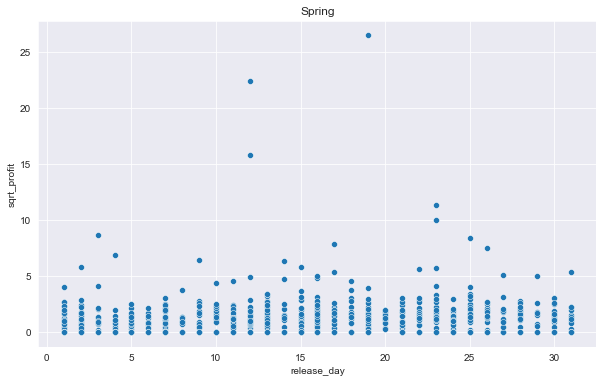

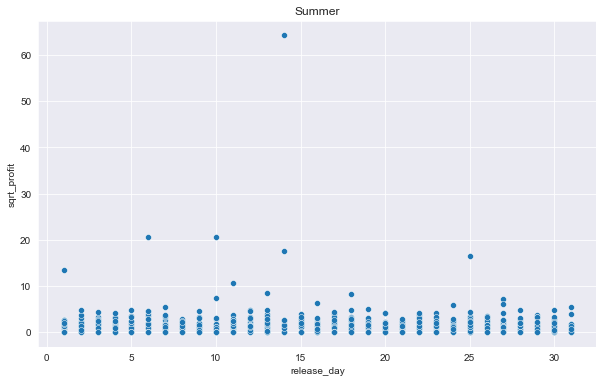

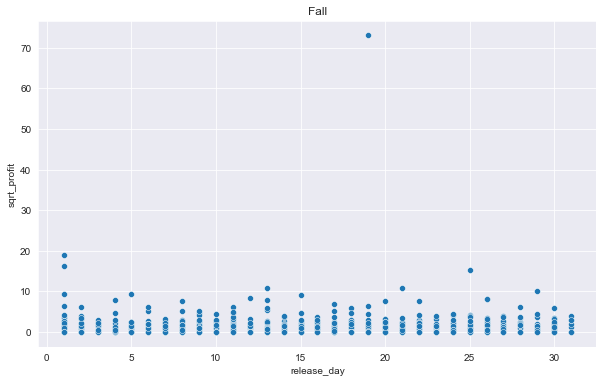

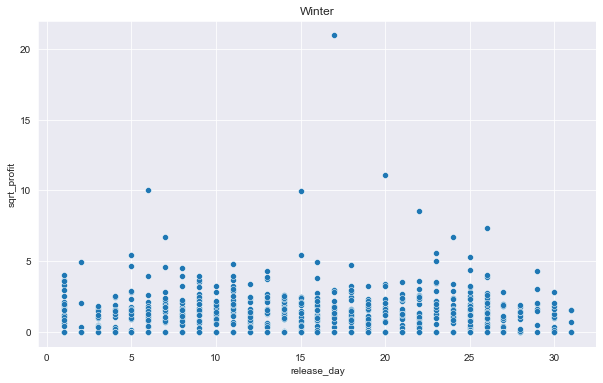

In [163]:
df_1['sqrt_profit'] = df_1['profitability_percentage'].apply(lambda x: np.sqrt(x) if x > 0 else 0)

# Filter data for each season
spring_data = df_1[(df_1['Season'] == 'Spring') & (df_1['sqrt_profit'] < 100)]
summer_data = df_1[(df_1['Season'] == 'Summer') & (df_1['sqrt_profit'] < 100)]
fall_data = df_1[(df_1['Season'] == 'Fall') & (df_1['sqrt_profit'] < 100)]
winter_data = df_1[(df_1['Season'] == 'Winter') & (df_1['sqrt_profit'] < 100)]


# Plot scatter plots for each season
plt.figure(figsize=(10,6))
sns.scatterplot(x='release_day', y='sqrt_profit', data=spring_data, palette='viridis')
plt.title('Spring')

plt.figure(figsize=(10,6))
sns.scatterplot(x='release_day', y='sqrt_profit', data=summer_data, palette='viridis')
plt.title('Summer')

plt.figure(figsize=(10,6))
sns.scatterplot(x='release_day', y='sqrt_profit', data=fall_data, palette='viridis')
plt.title('Fall')

plt.figure(figsize=(10,6))
sns.scatterplot(x='release_day', y='sqrt_profit', data=winter_data, palette='viridis')
plt.title('Winter')

plt.show()


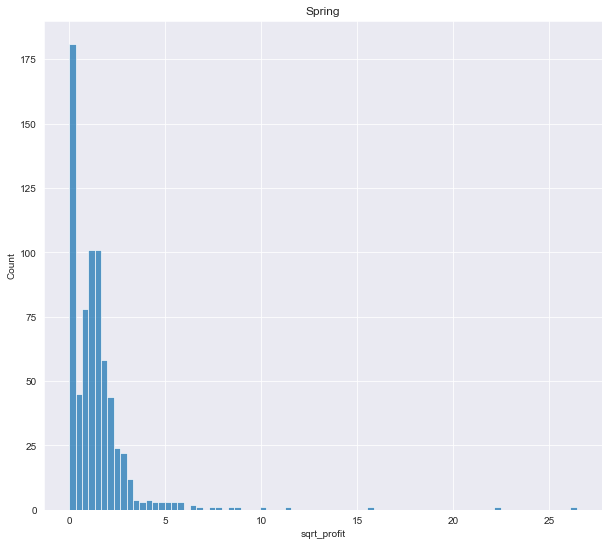

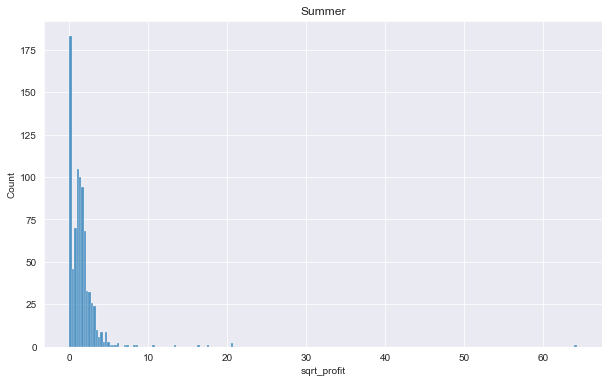

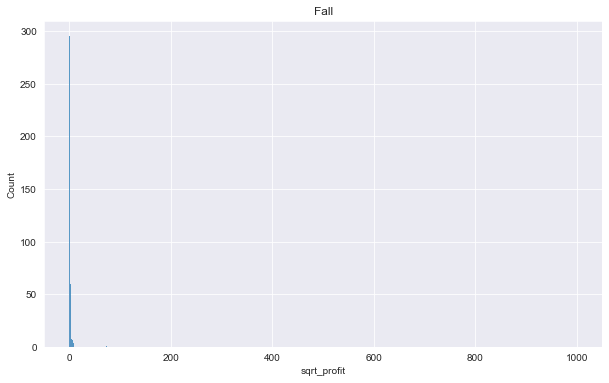

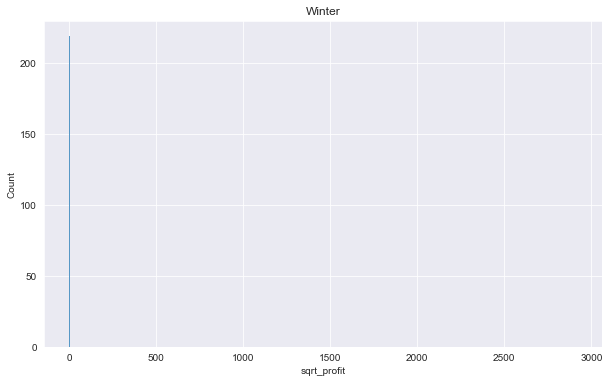

In [164]:
spring_data = df_1[df_1['Season'] == 'Spring']
summer_data = df_1[df_1['Season'] == 'Summer']
fall_data = df_1[df_1['Season'] == 'Fall']
winter_data = df_1[df_1['Season'] == 'Winter']


plt.figure(figsize=(10,9))
sns.histplot(x='sqrt_profit', data=spring_data)
plt.title('Spring')

plt.figure(figsize=(10,6))
sns.histplot(x='sqrt_profit', data=summer_data)
plt.title('Summer')

plt.figure(figsize=(10,6))
sns.histplot(x='sqrt_profit', data=fall_data)
plt.title('Fall')

plt.figure(figsize=(10,6))
sns.histplot(x='sqrt_profit', data=winter_data)
plt.title('Winter')

plt.show()




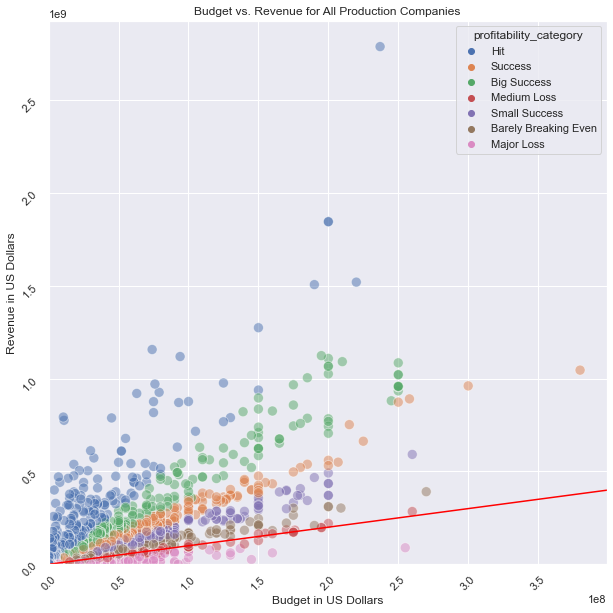

In [165]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(10, 10)})
# Plot a scatterplot of budget vs. revenue for all production companies

sns.scatterplot(x='budget', y='revenue', data=df_merged, s=100, alpha=0.5, hue='profitability_category')
plt.title('Budget vs. Revenue for All Production Companies')
plt.xlabel('Budget in US Dollars')
plt.ylabel('Revenue in US Dollars')
plt.xlim(0, None) # adjust the x axis limits to include 0
plt.ylim(0, None) # adjust the y axis limits to include 0
plt.xticks(rotation=45) # rotate the x axis labels for better readability
plt.yticks(rotation=45) # rotate the y axis labels for better readability

plt.plot([0, max(df['revenue'])], [0, max(df['revenue'])], 'red') # add a y=x line
plt.show()


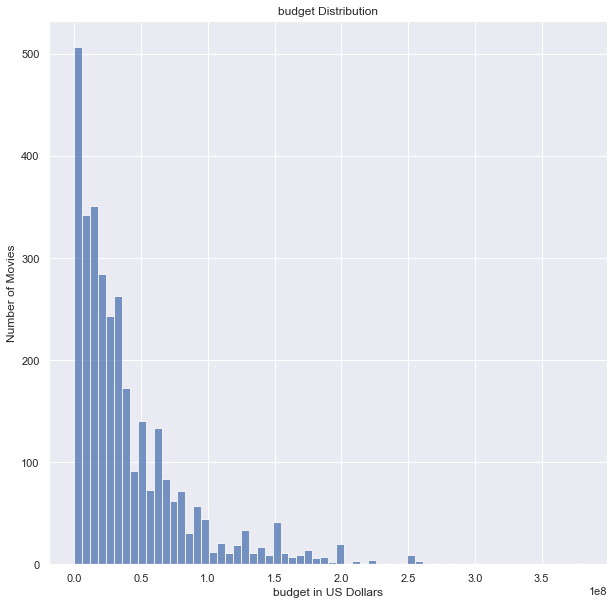

In [166]:
# Plot a histogram of the budget
sns.histplot(df['budget'], kde=False)
plt.title('budget Distribution')
plt.xlabel('budget in US Dollars')
plt.ylabel('Number of Movies')
plt.show()

In [176]:
# Write the DataFrames to CSV files in the 'capstone_data' directory
df_1.to_csv('capstone_data/df_1.csv', index=False)

In [175]:
df_top_10.to_csv('capstone_data/df_top_10.csv', index=False)

In [168]:
df_1.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage  movie_id  \
0                   http://www.avatarmovie.com/     19995   
1  http://disney.go.com/disneypictures/pirates/       285   
2   http://www.sonypictures.com/movies/spectre/    206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  ... release_month  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...            12   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...             5   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...            10   

  release_day  release_dayofyear  month_category profitable  Season  \
0          10                344     month_start        yes  Winter   
1          19                139       month_mid        yes  Spring   
2          26                299       month_end        yes    Fall   

  time_since_earliest profitability_percentage  profitability_category  \
0          34065 days                10.763566                     Hit   
1          33129 days                 2.203333                 Success   
2          36211 days                 2.594590             Big Success   

   sqrt_profit  
0     3.280787  
1     1.484363  
2     1.610773  

[3 rows x 30 columns]

In [169]:
df_genres_extracted_top_n.head(3)


movie_id  position       name department   job
0     19995         1     Action       None  None
1     19995         2  Adventure       None  None
2     19995         3    Fantasy       None  None

In [170]:
df_keywords_extracted_top_n.head(3)


movie_id  position           name department   job
0     19995         1  culture clash       None  None
1     19995         2         future       None  None
2     19995         3      space war       None  None

In [171]:
df_production_companies_extracted_top_n.head(3)


movie_id  position                                    name department   job
0     19995         1                 Ingenious Film Partners       None  None
1     19995         2  Twentieth Century Fox Film Corporation       None  None
2     19995         3                      Dune Entertainment       None  None

In [172]:
df_cast_extracted_top_n.head(3)


movie_id  position             name department   job
0     49529         1    Taylor Kitsch       None  None
1     49529         2     Lynn Collins       None  None
2     49529         3  Samantha Morton       None  None

In [173]:
df_crew_extracted_top_n.head(3)

movie_id  position               name  department                      job
0       285         1     Dariusz Wolski      Camera  Director of Photography
1       285         2     Gore Verbinski   Directing                 Director
2       285         3  Jerry Bruckheimer  Production                 Producer